# <font color =blue> Telecom Churn group case Study

The main goal of the case study is to build ML models to predict churn.

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
    
Recommend strategies to manage customer churn based on your observations.
    
Our submission illustrates the working on the given data set with different model appraoches and also indicative of what matrix would be better if the business objective is to predict
    1. Customer will churn or not
    2. Variables that are strong predictors of churn

## Main Steps to be followed:

### a) Importing, reading and understanding the data<br>b) Data Cleaning<br>c) Exploratory Data Analysis<br>d) Modelling<br>e) Conclusions

## a) Importing, reading and understanding the data

### Importing the necessary libraries

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing and reading the dataset

In [3]:
# Importing the data set

df_train = pd.read_csv("train (1).csv")
df_test = pd.read_csv("test (1).csv")
df_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


### Checking the shape of the dataset

In [4]:
df_train.shape

(69999, 172)

Data has 172 columns with 69999 record, further evaluation below to indicate the missing values, type of values in the data set

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


### Checking for statistical summary of the dataset

In [6]:
pd.set_option('display.max_columns', None)
df_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

As we see that there is 0 variance in the below columns. Hence, we will just drop these right away.<br>
'circle_id',<br>
'loc_og_t2o_mou',<br>
'std_og_t2o_mou',<br>
'loc_ic_t2o_mou',<br>
'std_og_t2c_mou_6',<br>
'std_og_t2c_mou_7',<br>
'std_og_t2c_mou_8',<br>
'std_ic_t2o_mou_6',<br>
'std_ic_t2o_mou_7',<br>
'std_ic_t2o_mou_8',

In [7]:
# dropping the above 10 variables from the train dataset

df_train.drop(['circle_id',
         'loc_og_t2o_mou',
         'std_og_t2o_mou',
         'loc_ic_t2o_mou',
         'std_og_t2c_mou_6',
         'std_og_t2c_mou_7',
         'std_og_t2c_mou_8',
         'std_ic_t2o_mou_6',
         'std_ic_t2o_mou_7',
         'std_ic_t2o_mou_8',], axis=1, inplace=True)

# dropping the above 10 variables from the test dataset

df_test.drop(['circle_id',
         'loc_og_t2o_mou',
         'std_og_t2o_mou',
         'loc_ic_t2o_mou',
         'std_og_t2c_mou_6',
         'std_og_t2c_mou_7',
         'std_og_t2c_mou_8',
         'std_ic_t2o_mou_6',
         'std_ic_t2o_mou_7',
         'std_ic_t2o_mou_8',], axis=1, inplace=True)

In [8]:
# checking the updated shape of the dataset

df_train.shape

(69999, 162)

In [9]:
# checking for the missing values in the train dataset

round(df_train.isnull().sum()/len(df_train.index)*100,2).sort_values(ascending=False).head(60)

count_rech_3g_6             74.90
av_rech_amt_data_6          74.90
total_rech_data_6           74.90
night_pck_user_6            74.90
max_rech_data_6             74.90
count_rech_2g_6             74.90
fb_user_6                   74.90
date_of_last_rech_data_6    74.90
arpu_3g_6                   74.90
arpu_2g_6                   74.90
av_rech_amt_data_7          74.48
count_rech_3g_7             74.48
date_of_last_rech_data_7    74.48
count_rech_2g_7             74.48
fb_user_7                   74.48
night_pck_user_7            74.48
max_rech_data_7             74.48
arpu_2g_7                   74.48
total_rech_data_7           74.48
arpu_3g_7                   74.48
night_pck_user_8            73.69
fb_user_8                   73.69
date_of_last_rech_data_8    73.69
av_rech_amt_data_8          73.69
max_rech_data_8             73.69
count_rech_2g_8             73.69
arpu_3g_8                   73.69
count_rech_3g_8             73.69
arpu_2g_8                   73.69
total_rech_dat

In [10]:
# checking for the missing values in the test dataset

round(df_test.isnull().sum()/len(df_test.index)*100,2).sort_values(ascending=False).head(60)

arpu_3g_6                   74.72
count_rech_2g_6             74.72
fb_user_6                   74.72
arpu_2g_6                   74.72
night_pck_user_6            74.72
date_of_last_rech_data_6    74.72
av_rech_amt_data_6          74.72
total_rech_data_6           74.72
count_rech_3g_6             74.72
max_rech_data_6             74.72
fb_user_7                   74.31
night_pck_user_7            74.31
total_rech_data_7           74.31
max_rech_data_7             74.31
date_of_last_rech_data_7    74.31
arpu_2g_7                   74.31
arpu_3g_7                   74.31
count_rech_3g_7             74.31
count_rech_2g_7             74.31
av_rech_amt_data_7          74.31
max_rech_data_8             73.59
arpu_3g_8                   73.59
fb_user_8                   73.59
night_pck_user_8            73.59
av_rech_amt_data_8          73.59
arpu_2g_8                   73.59
date_of_last_rech_data_8    73.59
count_rech_3g_8             73.59
total_rech_data_8           73.59
count_rech_2g_

##### We have a good % of missing values. Missing value treatment:
ARPU  : Average revenue per user<br>
RECH  : Recharge<br> 
For above 2 columns if the value does not exist it simple means the customer did not recharge and no revenue for that month, 
Hence all missing values will be imputed with Zero

In [11]:
col_rech=[]
for col in list(df_train.columns):
    if ('rech' in col):
        col_rech.append(col)

In [12]:
for col in list(df_train.columns):
    if ('arpu' in col):
        col_rech.append(col)

In [13]:
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [14]:
# imputing zeroes for all above columns in train dataset

df_train[col_rech]=df_train[col_rech].apply(lambda x: x.fillna(0))


# imputing zeroes for all above columns in test dataset

df_test[col_rech]=df_test[col_rech].apply(lambda x: x.fillna(0))

In [15]:
# checking for the missing values in the train dataset

round(df_train.isnull().sum()/len(df_train.index)*100,2).sort_values(ascending=False).head(10)

night_pck_user_6    74.90
fb_user_6           74.90
night_pck_user_7    74.48
fb_user_7           74.48
night_pck_user_8    73.69
fb_user_8           73.69
std_ic_mou_8         5.29
loc_og_mou_8         5.29
loc_ic_mou_8         5.29
loc_og_t2f_mou_8     5.29
dtype: float64

In [16]:
# checking for the missing values in the test dataset

round(df_test.isnull().sum()/len(df_test.index)*100,2).sort_values(ascending=False).head(10)

night_pck_user_6    74.72
fb_user_6           74.72
fb_user_7           74.31
night_pck_user_7    74.31
fb_user_8           73.59
night_pck_user_8    73.59
loc_ic_t2f_mou_8     5.58
loc_og_t2f_mou_8     5.58
loc_ic_t2m_mou_8     5.58
loc_og_t2c_mou_8     5.58
dtype: float64

In [17]:
# checking for categorical variables in train dataset

col_categorical_var=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

From above we will now treat missing values for columns night_pck_user_6, night_pck_user_7, night_pck_user_8 and 
fb_user_6, fb_user_7 and fb_user_8


In [18]:
# imputing missing categories as -1 in train dataset where '-1' will be a new category

df_train[col_categorical_var]=df_train[col_categorical_var].apply(lambda x: x.fillna(-1))

In [19]:
# checking for the missing values in the train dataset

round(df_train.isnull().sum()/len(df_train.index)*100,2).sort_values(ascending=False).head()

std_ic_mou_8        5.29
loc_og_t2c_mou_8    5.29
loc_og_t2f_mou_8    5.29
loc_ic_t2t_mou_8    5.29
loc_ic_t2m_mou_8    5.29
dtype: float64

In [20]:
# imputing missing categories as -1 in test dataset where '-1' will be a new category

df_test[col_categorical_var]=df_test[col_categorical_var].apply(lambda x: x.fillna(-1))

In [21]:
# checking for the missing values in the test dataset

round(df_test.isnull().sum()/len(df_test.index)*100,2).sort_values(ascending=False).head()

loc_ic_t2t_mou_8    5.58
isd_og_mou_8        5.58
loc_og_t2f_mou_8    5.58
spl_og_mou_8        5.58
loc_ic_t2m_mou_8    5.58
dtype: float64

##### We now have missing values approx. 5% to 6% of total values missing only

looking at the date columns:<br>
'last_date_of_month_6',<br>
'last_date_of_month_7',<br>
'last_date_of_month_8'

In [22]:
df_train.last_date_of_month_6.value_counts()

6/30/2014    69999
Name: last_date_of_month_6, dtype: int64

In [23]:
df_train.last_date_of_month_7.value_counts()

7/31/2014    69600
Name: last_date_of_month_7, dtype: int64

In [24]:
df_train.last_date_of_month_8.value_counts()

8/31/2014    69266
Name: last_date_of_month_8, dtype: int64

From above, we see that these 03 columns have a constant value. So let's just drop these columns

In [25]:
# droppping the above 03 columns from train dataset

df_train.drop([ 'last_date_of_month_6',
                'last_date_of_month_7',
                'last_date_of_month_8'], axis=1, inplace=True) 

# droppping the above 03 columns from test dataset

df_test.drop([ 'last_date_of_month_6',
                'last_date_of_month_7',
                'last_date_of_month_8'], axis=1, inplace=True) 

In [26]:
df_train.shape

(69999, 159)

In [27]:
df_test.shape

(30000, 158)

In [28]:
# fetching all remaining date columns

col_dates=[]
for col in list(df_train.columns):
    if ('date' in col):
        col_dates.append(col)

In [29]:
#  Seggregation of date columns

col_dates

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [30]:
# checking for missing values in date columns in train dataset

df_train[['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']].isnull().sum()

date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
dtype: int64

In [31]:
# checking for missing values in date columns in test dataset

df_test[['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']].isnull().sum()

date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
dtype: int64

In [32]:
# treating leftover missing values in train dataset

missing_values = round(100*(df_train.isnull().sum()/len(df_train)), 2)
miss_columns = missing_values[missing_values != 0]

In [33]:
miss_columns_list = miss_columns.index

In [34]:
# imputing the null values in the above columns in train dataset

for i in miss_columns_list:
    df_train[i] = df_train[i].fillna(0).astype(int)

In [35]:
# checking for missing values in train dataset

round(df_train.isnull().sum()/len(df_train.index),2).sort_values(ascending=False).head()

id                     0.0
total_rech_data_6      0.0
date_of_last_rech_8    0.0
last_day_rch_amt_6     0.0
last_day_rch_amt_7     0.0
dtype: float64

In [36]:
# imputing the null values in the above columns in test dataset

for i in miss_columns_list:
    df_test[i] = df_test[i].fillna(0).astype(int)

In [37]:
# checking for missing values in test dataset

round(df_test.isnull().sum()/len(df_test.index),2).sort_values(ascending=False).head()

id                          0.0
date_of_last_rech_data_8    0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
last_day_rch_amt_6          0.0
dtype: float64

#### We have now treated all the missing values in our data set
        

## b) Data Cleaning

In [38]:
# checking for null values in date columns

(df_train['date_of_last_rech_data_6'] == 0).sum()

52431

In [39]:
# checking for null values in date columns

(df_train['date_of_last_rech_data_7'] == 0).sum()

52134

In [40]:
# checking for null values in date columns

(df_train['date_of_last_rech_data_8'] == 0).sum()

51582

In [41]:
# since the most of the cells in the below columns are 0, we will drop these columns anyway

# 'date_of_last_rech_data_6',
# 'date_of_last_rech_data_7',
# 'date_of_last_rech_data_8'


# dropping the above columns from train dataset

df_train.drop(['date_of_last_rech_data_6',
               'date_of_last_rech_data_7',
               'date_of_last_rech_data_8'], axis=1, inplace=True)


# dropping the above columns from test dataset

df_test.drop(['date_of_last_rech_data_6',
               'date_of_last_rech_data_7',
               'date_of_last_rech_data_8'], axis=1, inplace=True)

In [42]:
# removing the below date columns as well since we will rather use 'aon' as it tells us the age of the network.
# hence, removing the below date columns as well:

# 'date_of_last_rech_6',
# 'date_of_last_rech_7',
# 'date_of_last_rech_8'

# dropping the above columns from train dataset

df_train.drop(['date_of_last_rech_6',
               'date_of_last_rech_7',
               'date_of_last_rech_8'], axis=1, inplace=True)


# dropping the above columns from test dataset

df_test.drop(['date_of_last_rech_6',
              'date_of_last_rech_7',
              'date_of_last_rech_8'], axis=1, inplace=True)

In [43]:
# checking the shape of train dataset

df_train.shape

(69999, 153)

In [44]:
# checking the shape of test dataset

df_test.shape

(30000, 152)

### Checking for outliers

In [45]:
# checking for the statistical summary of the numerical variables

df_train.describe([0.25,0.50,0.75,0.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69

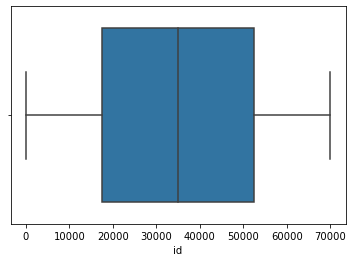

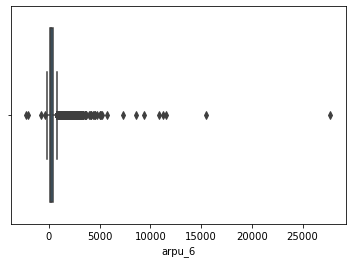

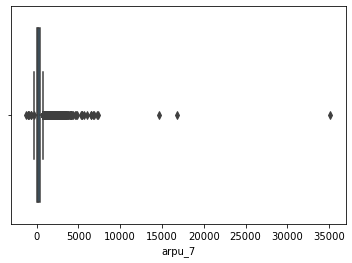

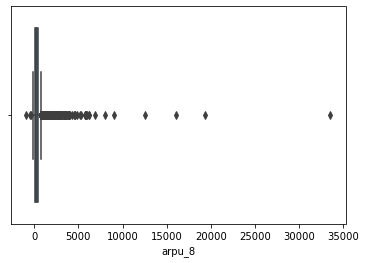

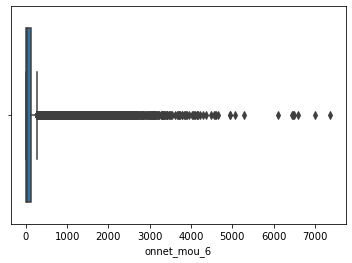

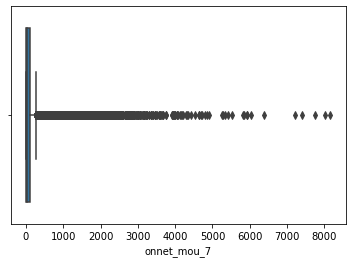

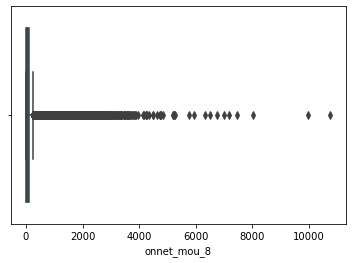

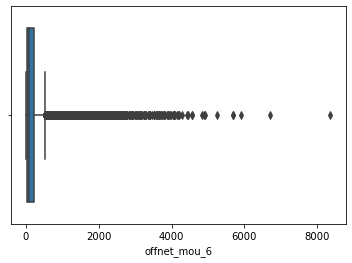

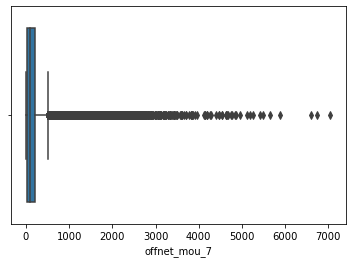

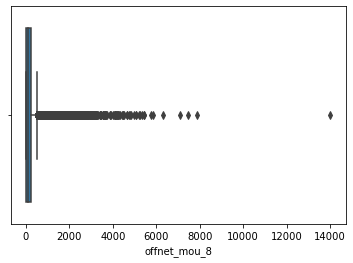

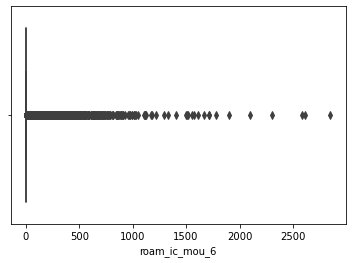

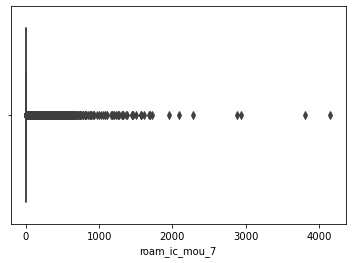

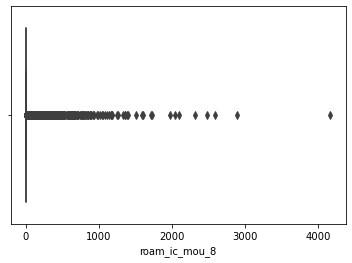

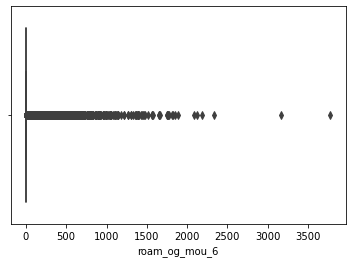

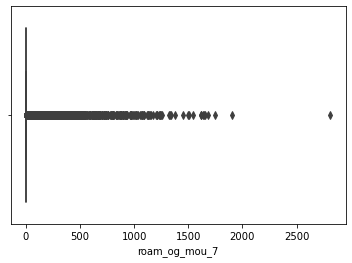

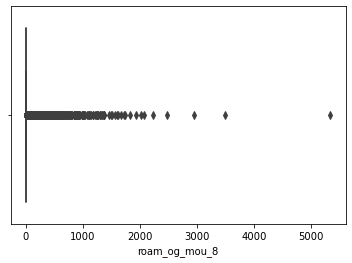

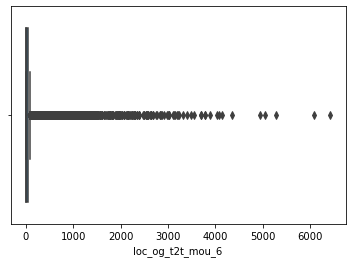

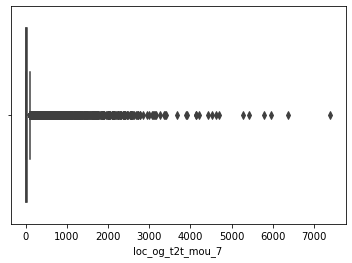

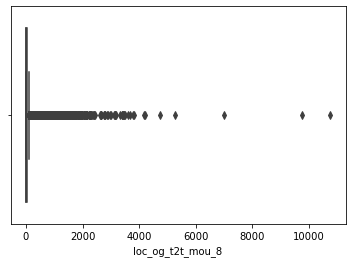

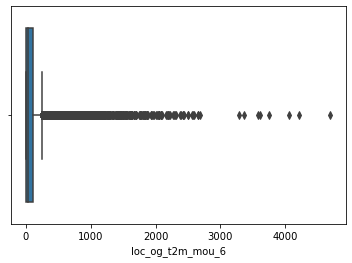

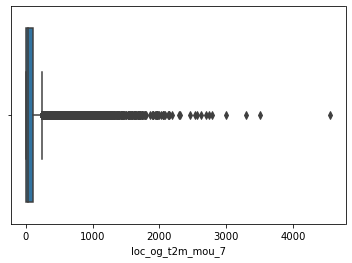

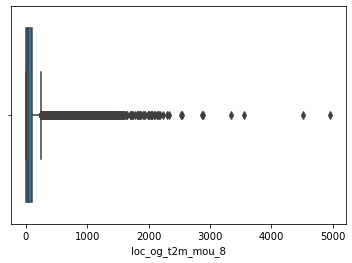

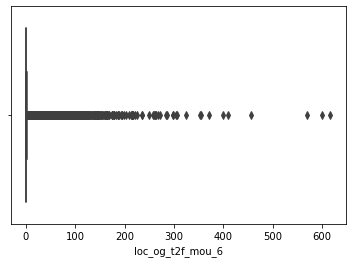

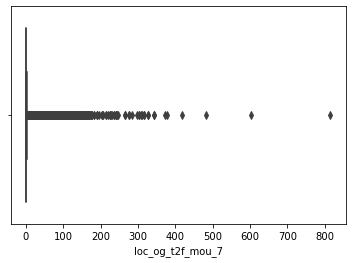

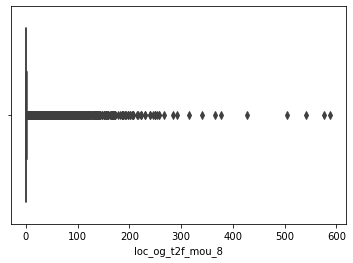

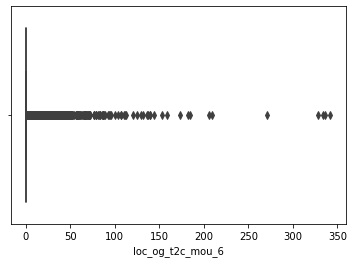

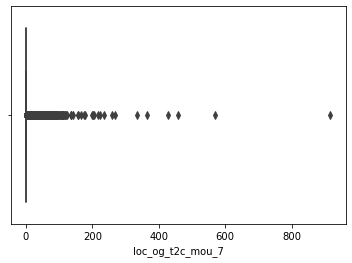

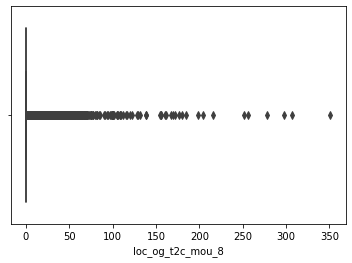

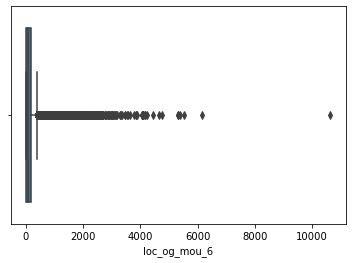

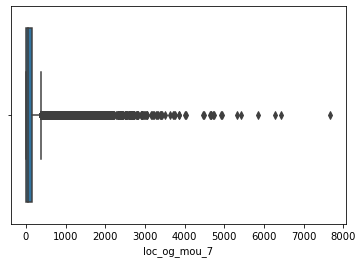

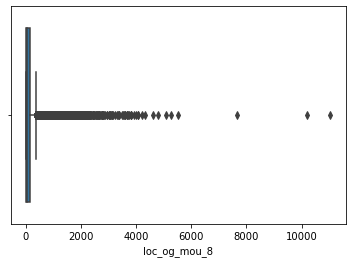

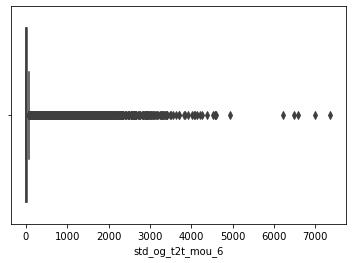

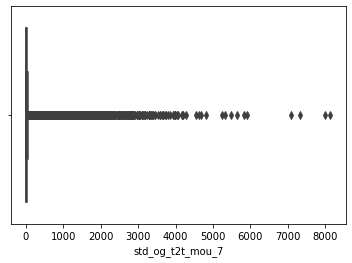

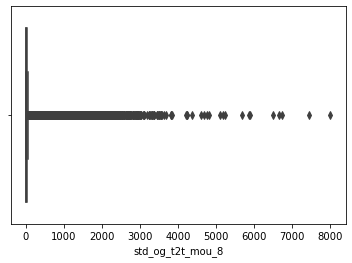

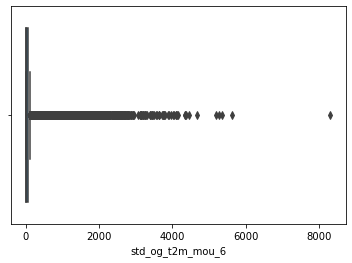

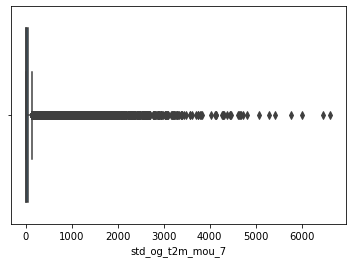

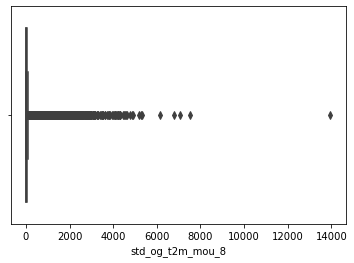

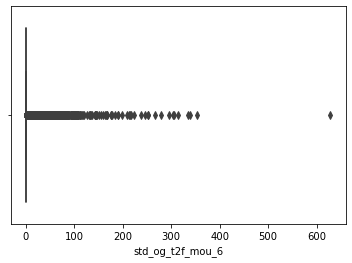

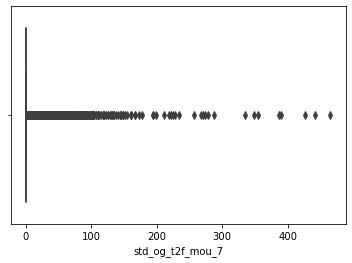

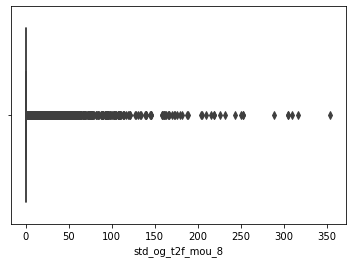

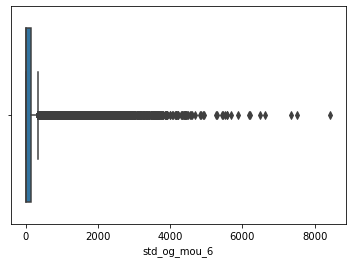

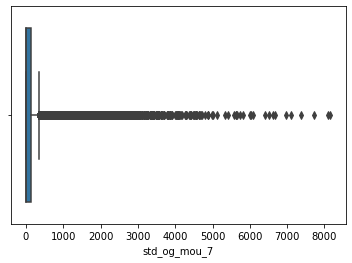

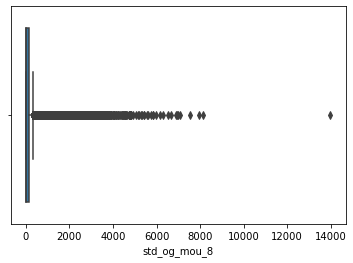

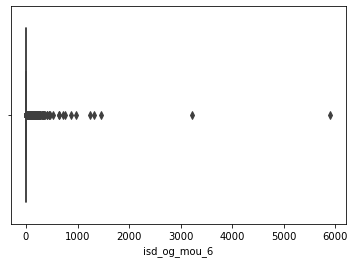

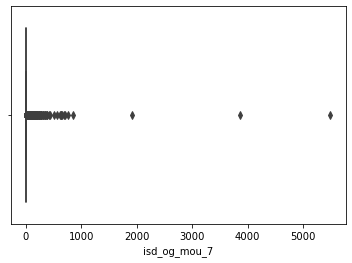

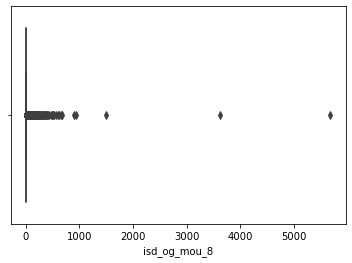

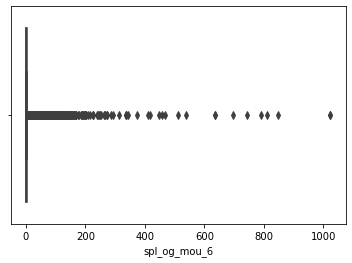

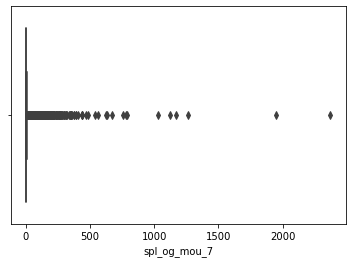

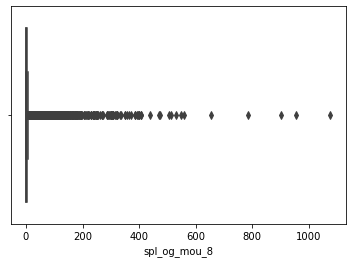

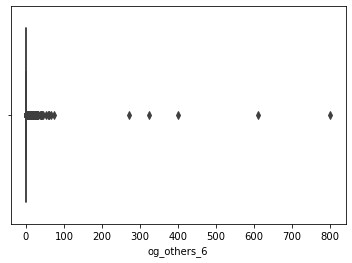

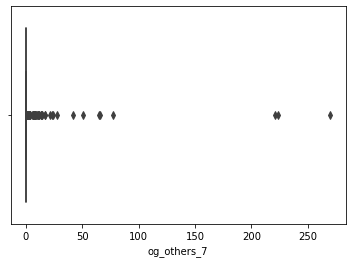

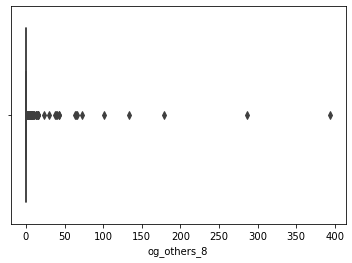

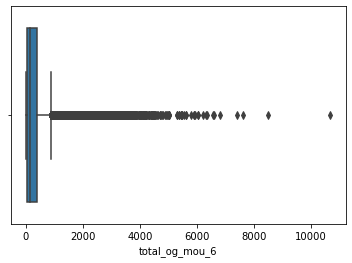

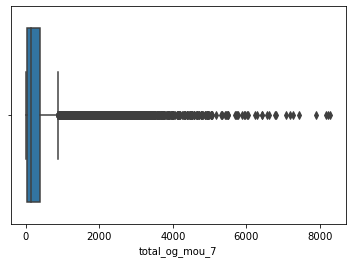

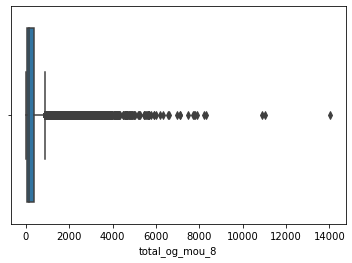

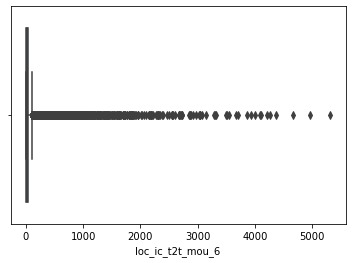

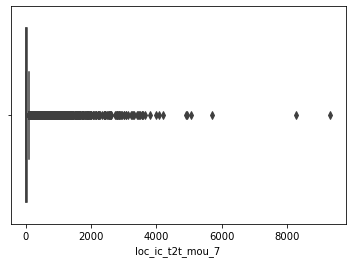

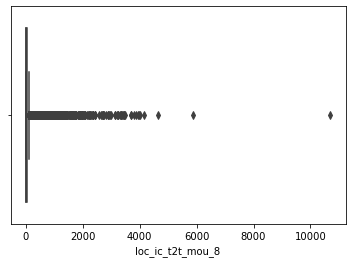

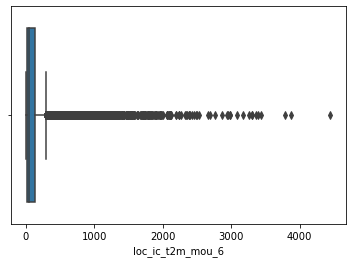

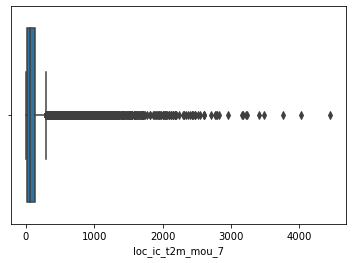

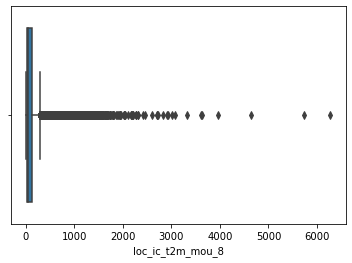

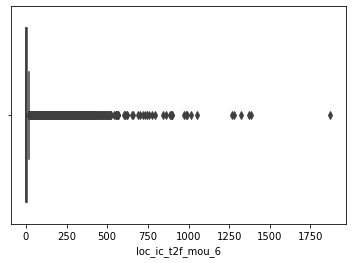

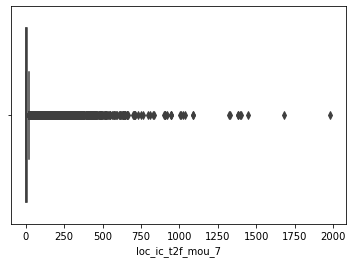

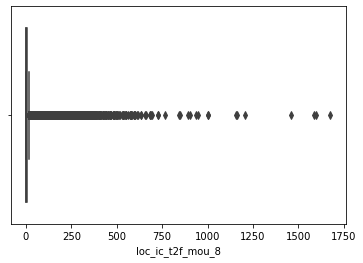

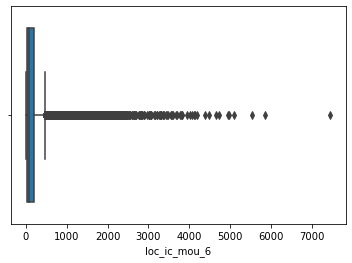

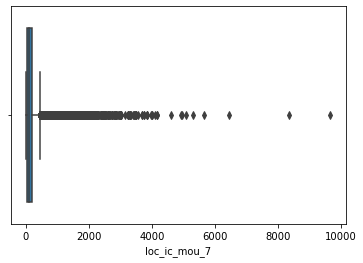

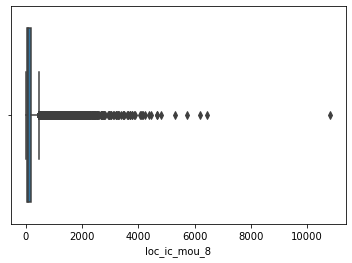

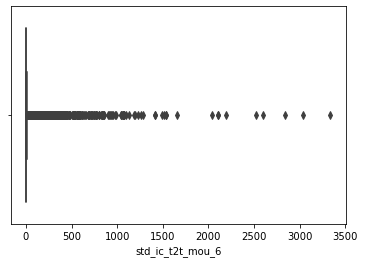

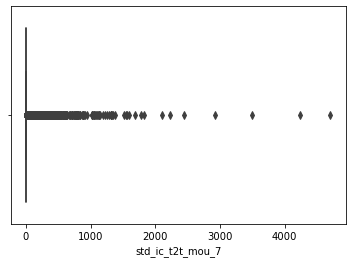

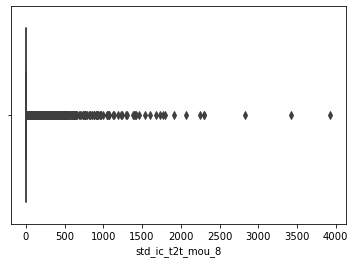

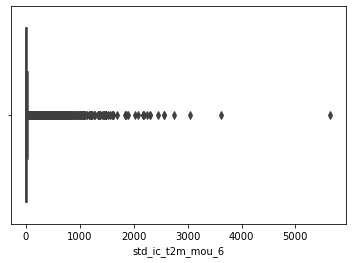

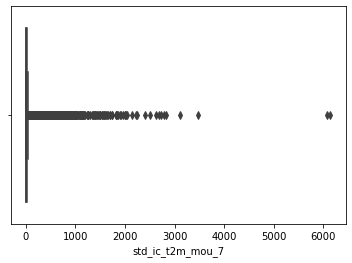

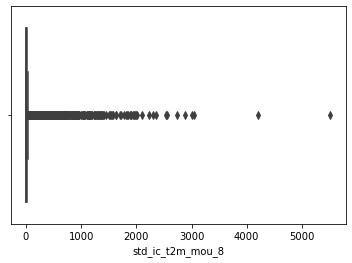

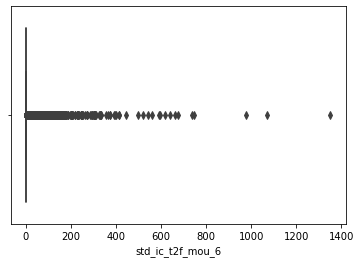

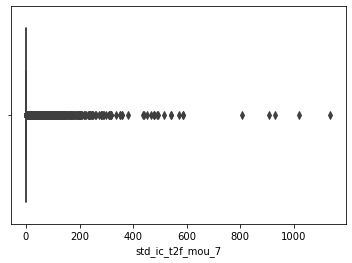

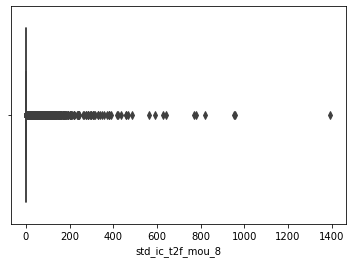

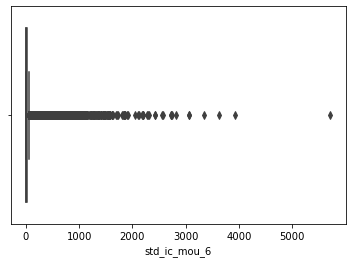

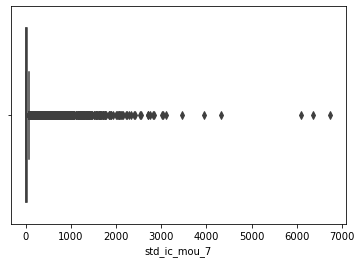

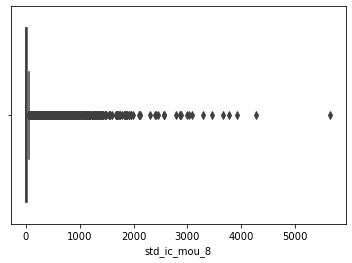

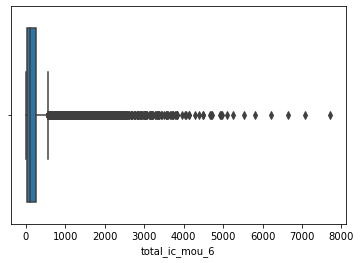

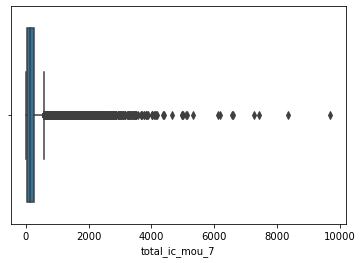

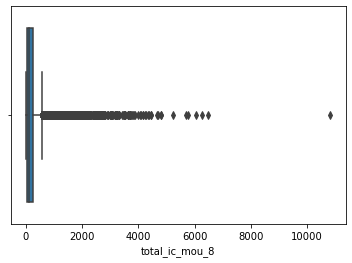

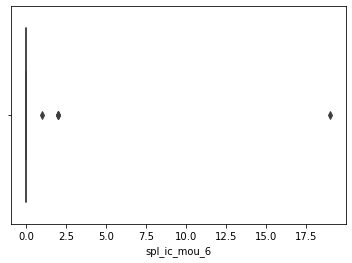

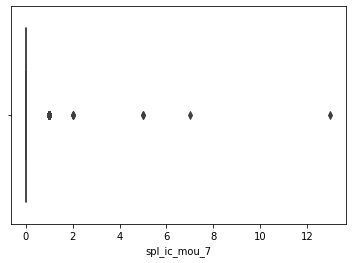

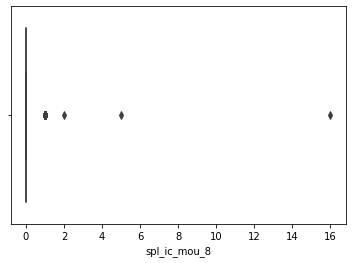

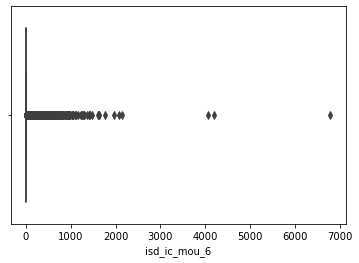

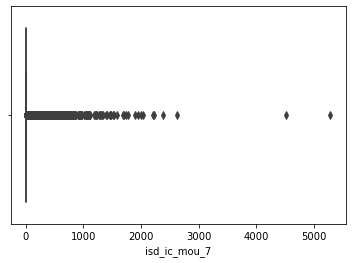

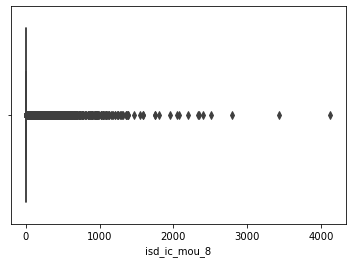

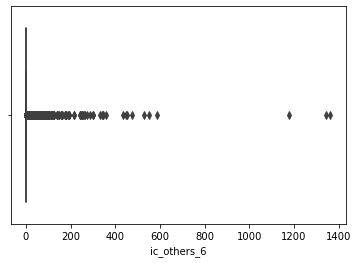

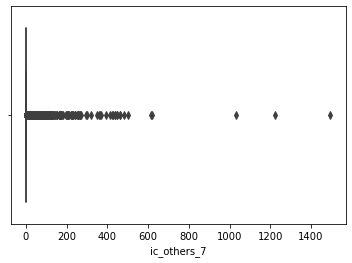

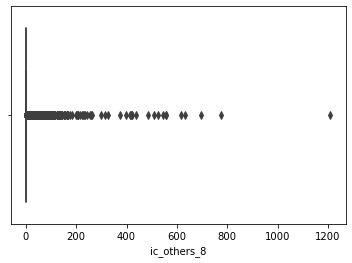

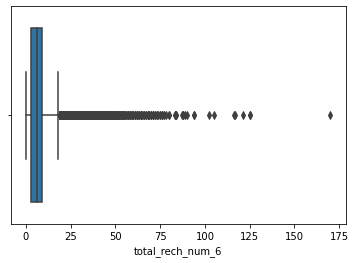

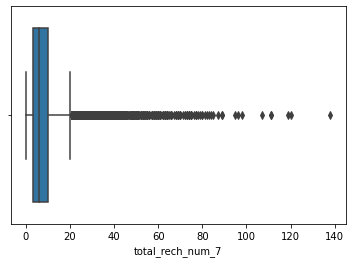

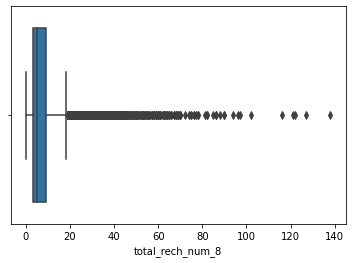

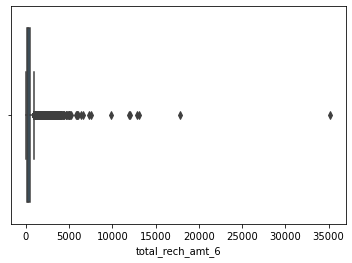

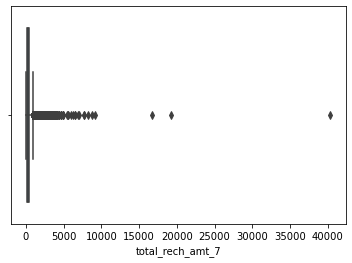

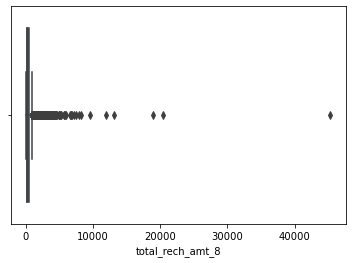

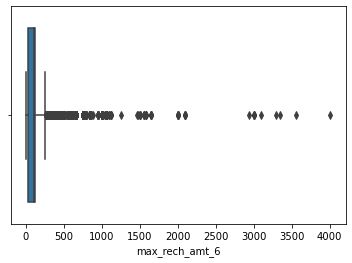

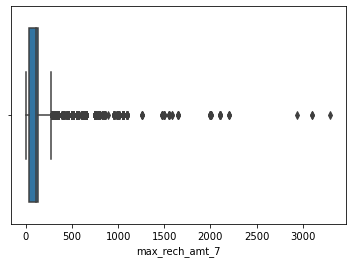

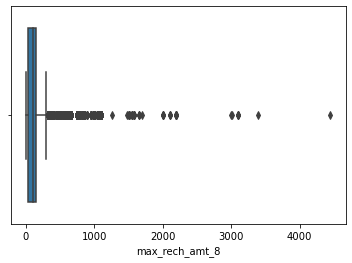

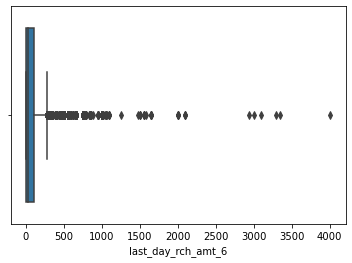

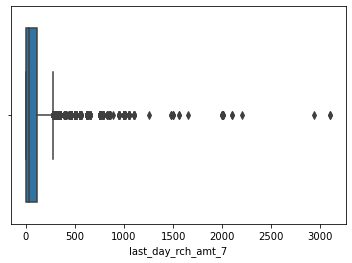

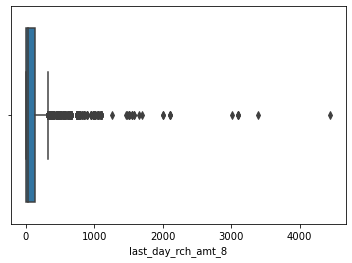

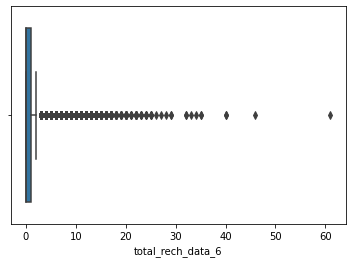

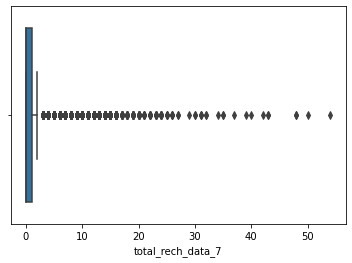

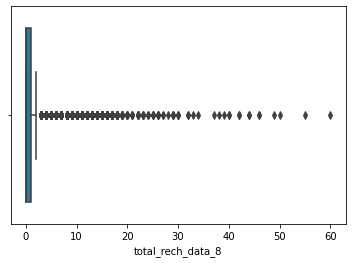

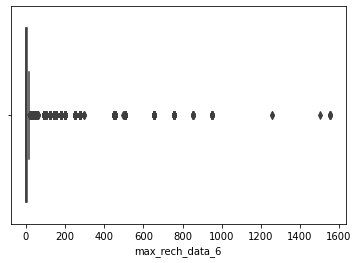

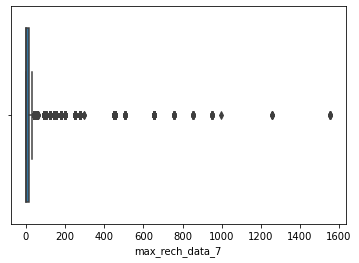

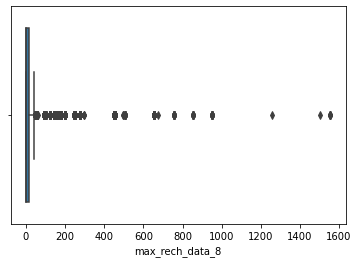

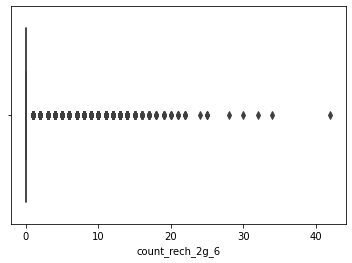

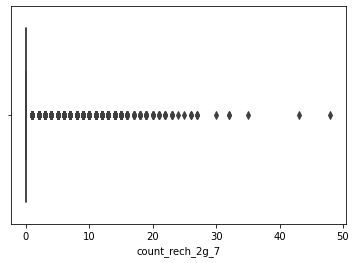

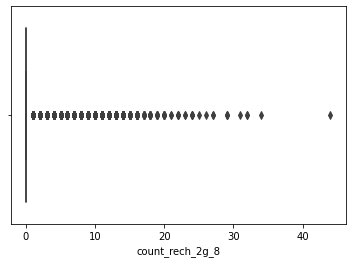

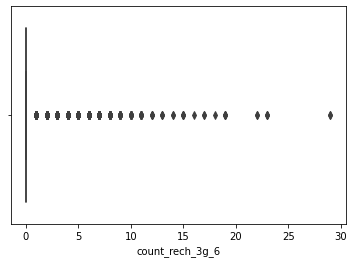

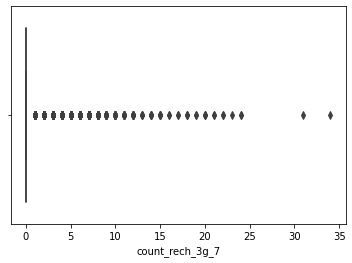

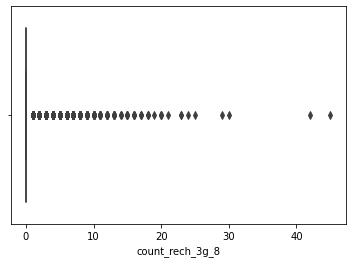

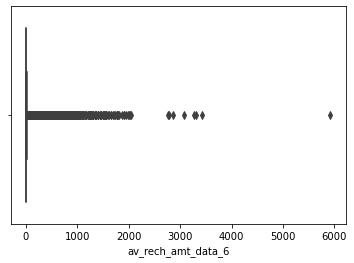

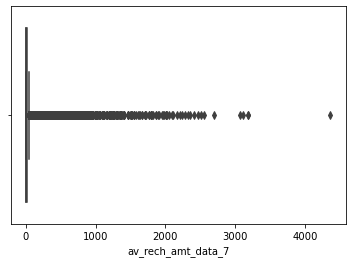

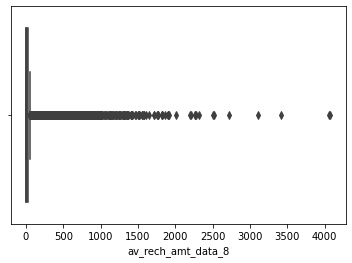

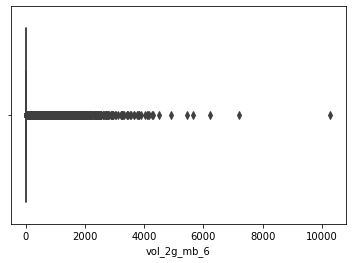

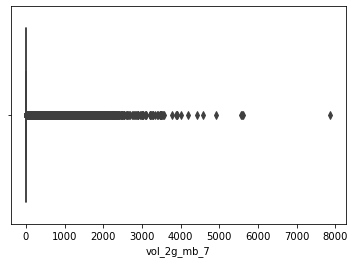

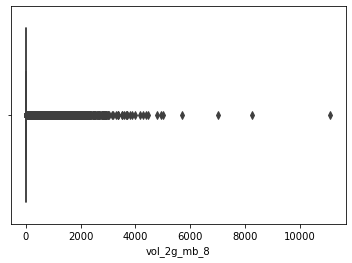

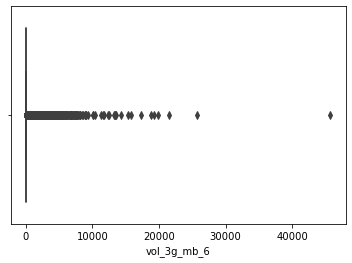

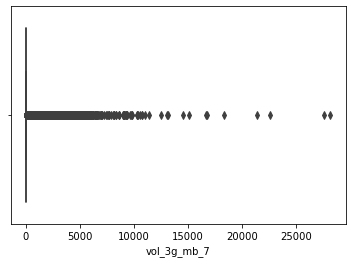

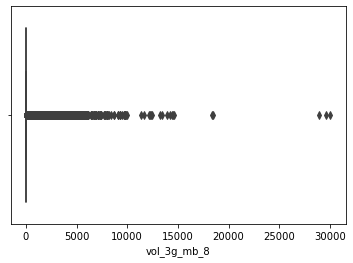

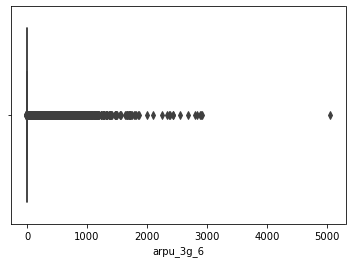

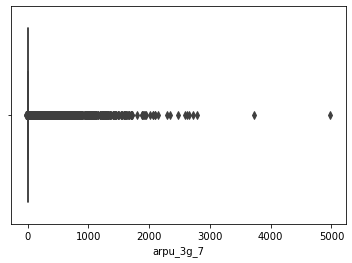

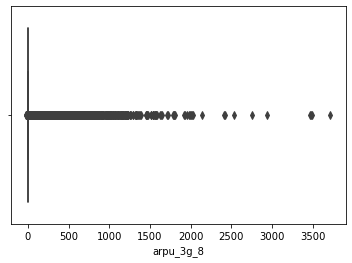

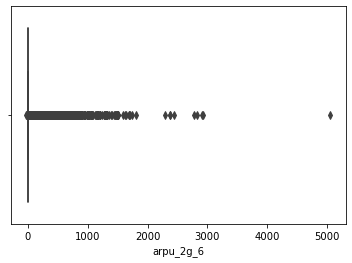

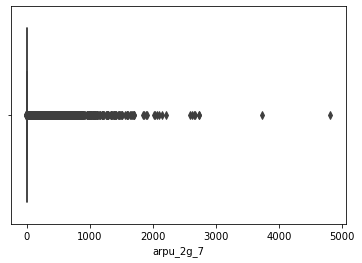

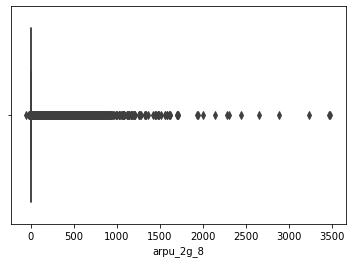

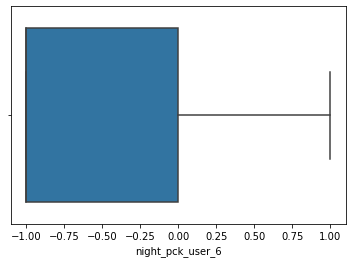

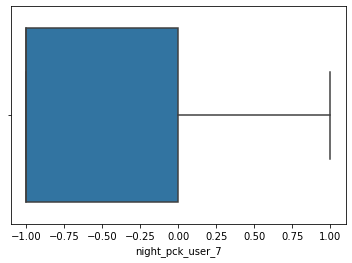

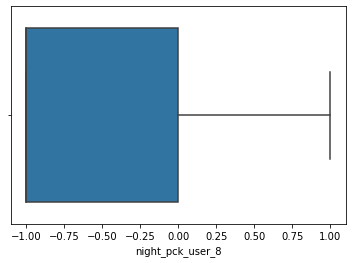

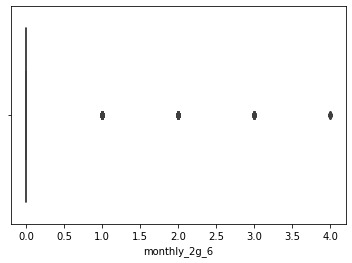

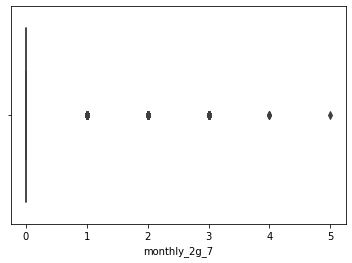

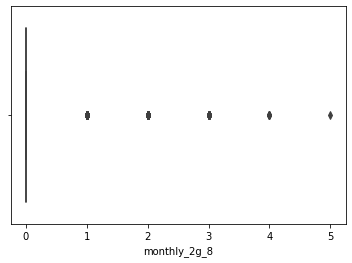

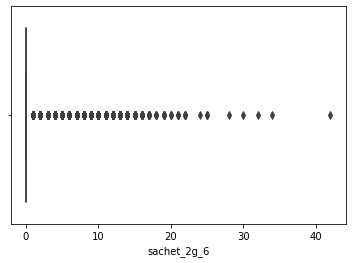

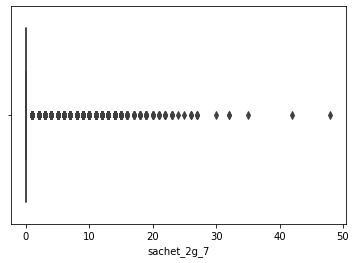

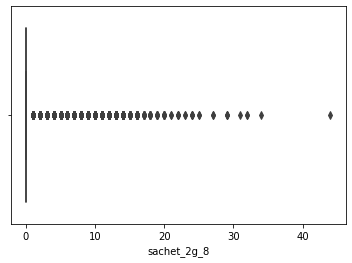

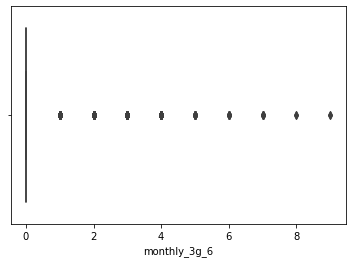

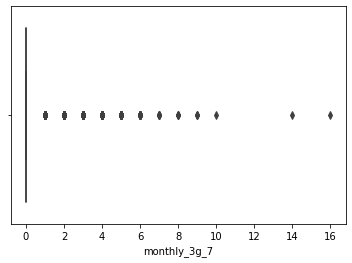

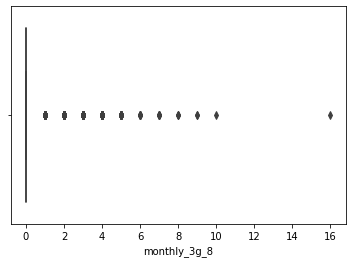

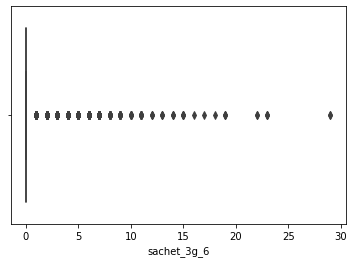

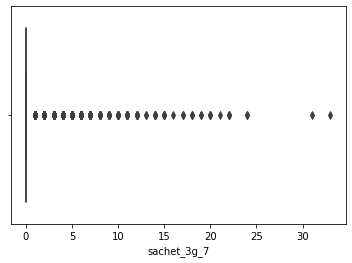

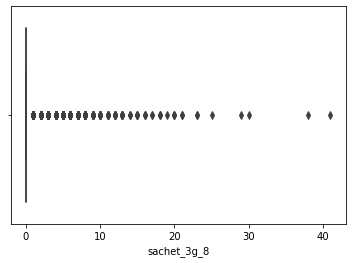

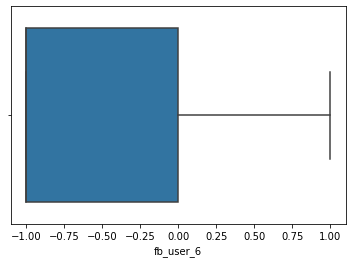

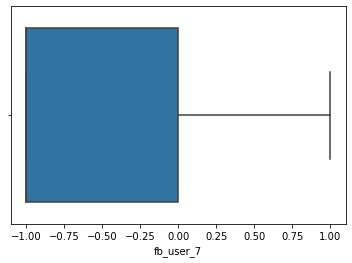

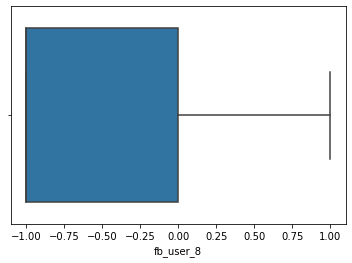

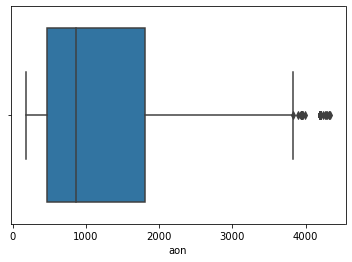

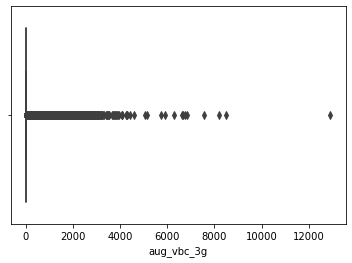

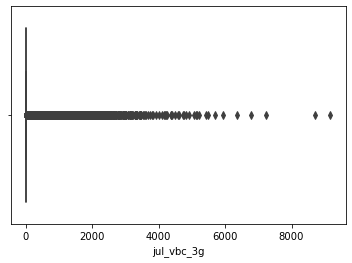

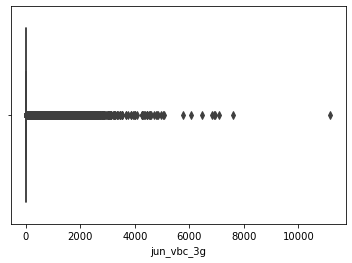

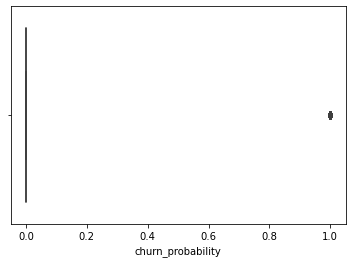

In [46]:
# will check for box plots for outliers

for i in df_train.columns:
    sns.boxplot(df_train[i])
    plt.xlabel(i)
    plt.show()

## c) Exploratory Data Analysis

### Univariate Analysis

In [47]:
# In order to avoid repetitive code writing, we will use loop to create distplots for all columns under univariate analysis

In [48]:
# creating an another dataframe df_train1 by removing the 'id' column

df_train1 = df_train.drop(['id'], axis=1, inplace=False)

In [49]:
# creating a list of columns for which we are going to do the univariate analysis

univ_columns = ['loc_og_t2t_mou_8',
                'og_others_8',
                'loc_ic_t2t_mou_8',
                'loc_ic_t2m_mou_7',
                'loc_ic_mou_8',
                'std_ic_t2t_mou_8',
                'std_ic_t2m_mou_8',
                'std_ic_mou_8',
                'total_ic_mou_8',
                'spl_ic_mou_8',
                'isd_ic_mou_8',
                'total_rech_num_8',
                'last_day_rch_amt_8',
                'av_rech_amt_data_8',
                'arpu_2g_8']

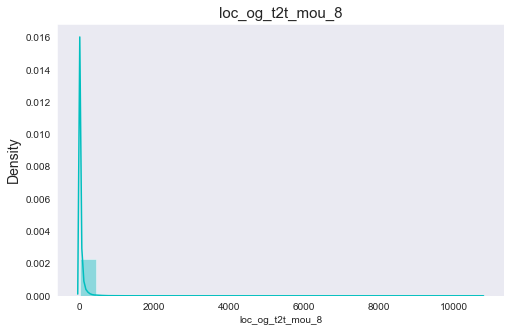

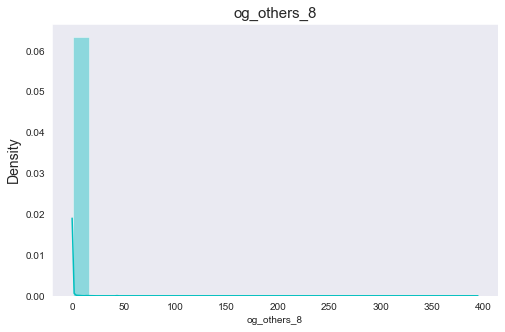

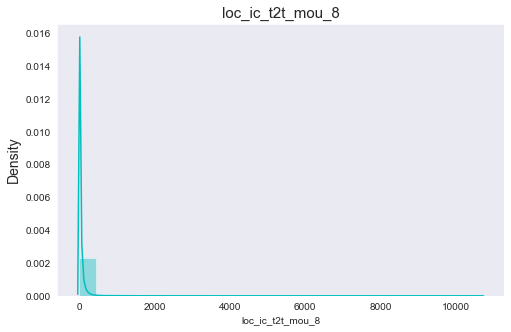

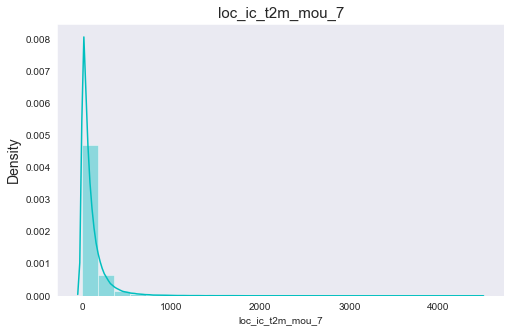

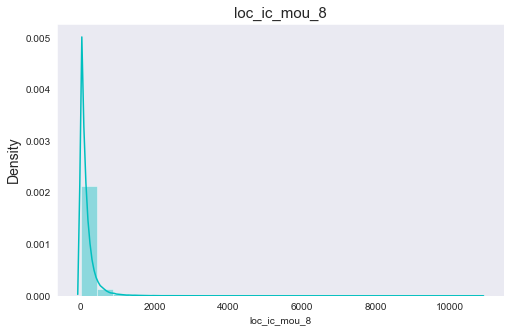

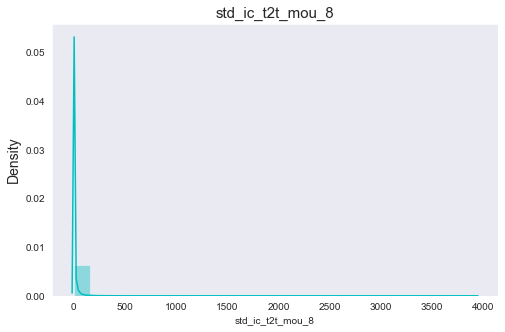

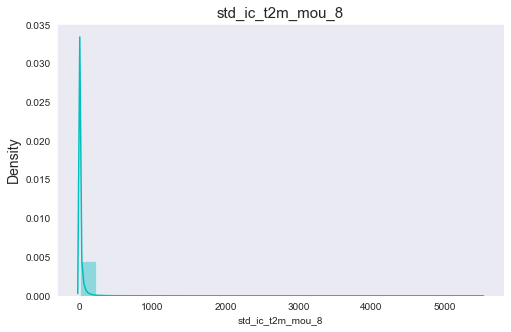

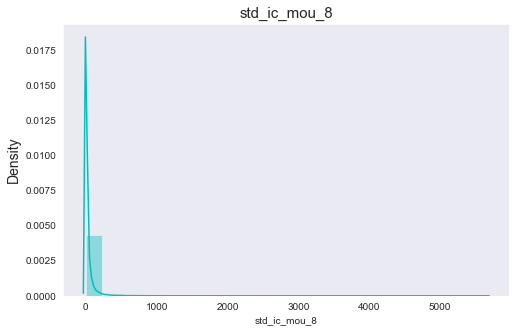

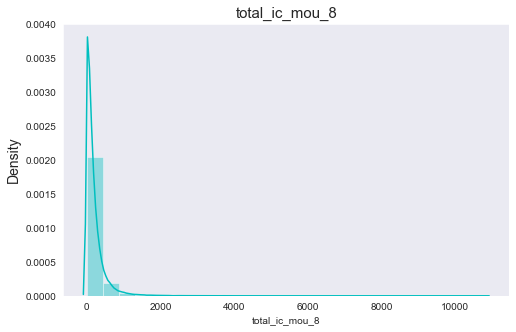

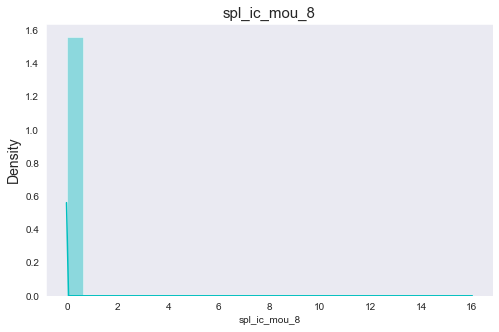

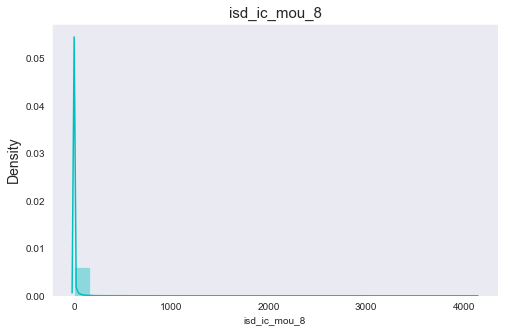

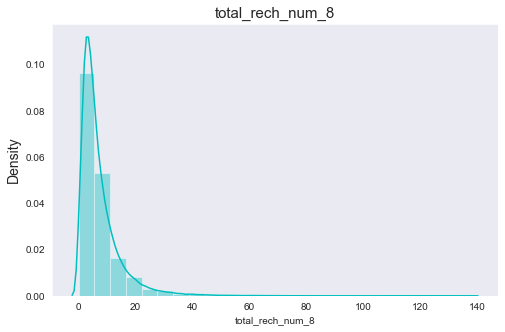

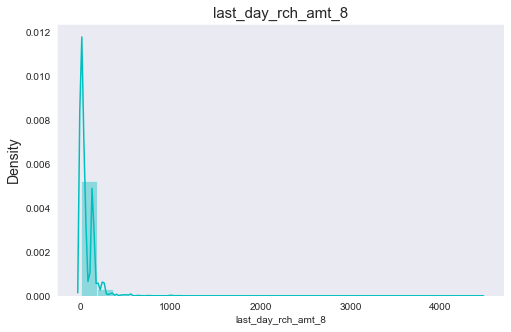

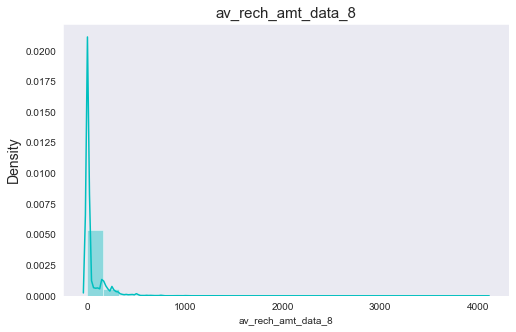

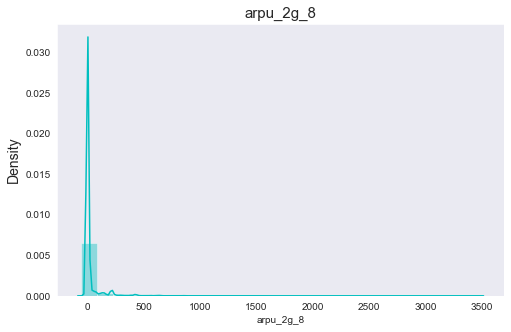

In [50]:
# using for loop to create plots and analysing the different columns

for i in df_train1[univ_columns]:
    plt.figure(figsize=[8,5])
    sns.set_style("dark")
    sns.distplot(df_train1[i], bins=25, color="c")
    plt.title(i, fontsize=15)
    plt.ylabel("Density",fontsize=14)
    plt.show()

### Bivariate Analysis

In [51]:
# Recharge amount related variables analysis

In [52]:
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for value 
    greater than 10 , black otherwise.
    """
    color = 'red' if val > 5 else 'black'
    return 'color: %s' % color

In [53]:
# create box plot for  6th, 7th and 8th month

df = df_train.plot
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    
    plt.subplot(2,3,1)
    sns.boxplot(data=df_train, y=attribute+"_6",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df_train, y=attribute+"_7",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df_train, y=attribute+"_8",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.show()

In [54]:
recharge_amnt_columns =  df_train.columns[df_train.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

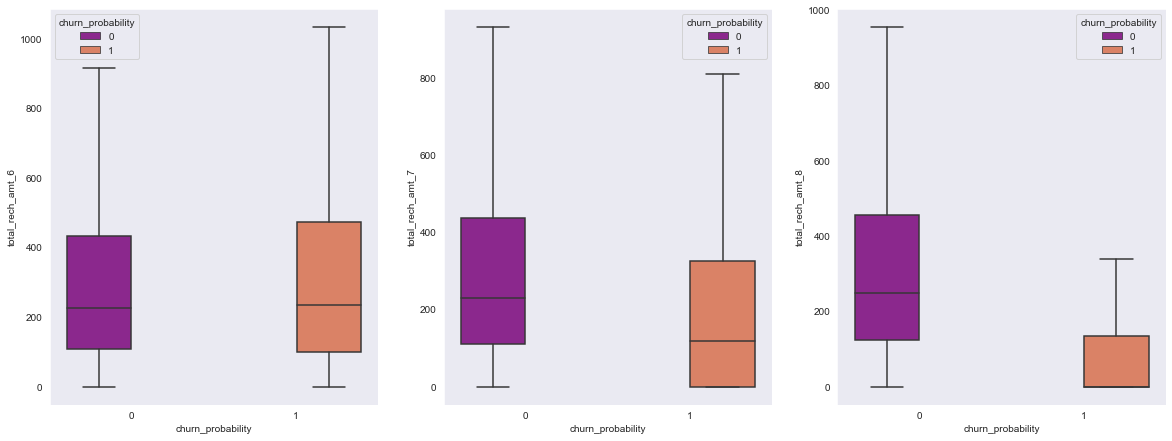

In [55]:
# ploting for total recharge amount

plot_box_chart('total_rech_amt')

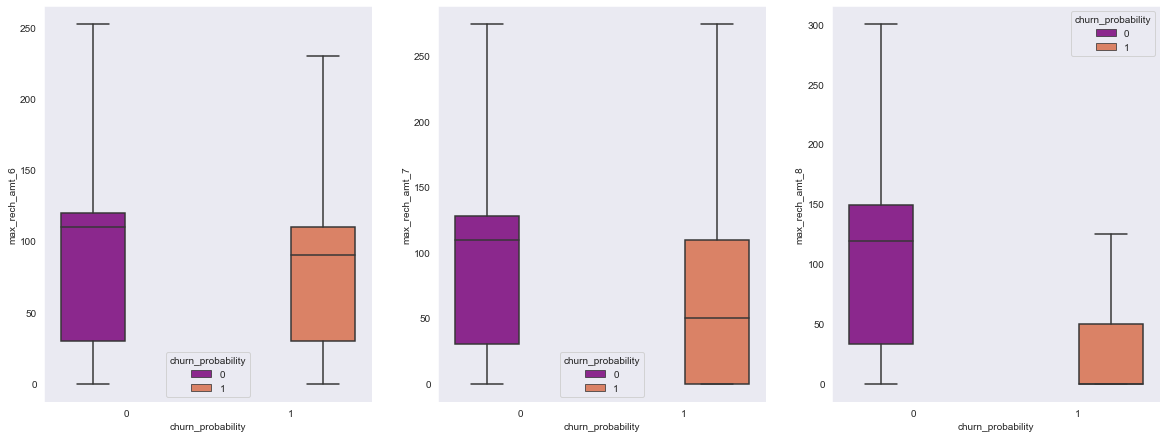

In [56]:
# ploting for maximum recharge amount

plot_box_chart('max_rech_amt')

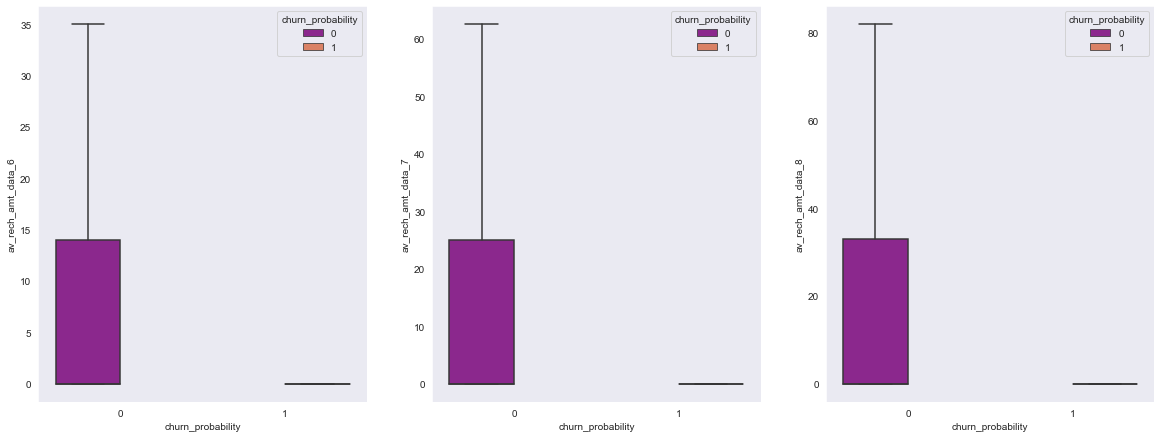

In [57]:
# ploting for average recharge amount for data:

plot_box_chart('av_rech_amt_data')

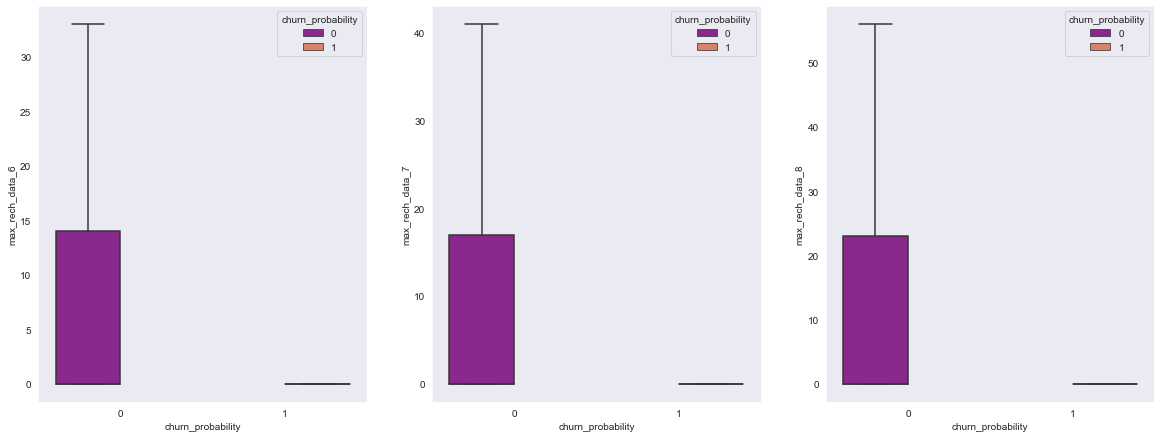

In [58]:
# ploting for maximum recharge for data:

plot_box_chart('max_rech_data')

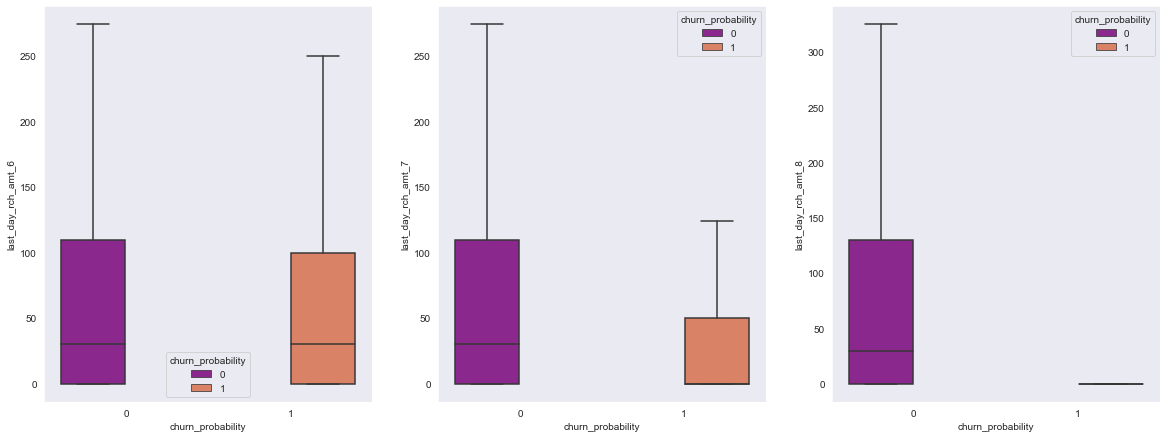

In [59]:
# getting the last day recharge amount columns

last_day_rech_amt = df_train.columns[df_train.columns.str.contains('day')]
last_day_rech_amt.tolist()

# ploting for last day recharge amount:

plot_box_chart('last_day_rch_amt')


Inferences:
    
  1. av_rech_amt_data: We see that there is no dependency of this variable on the output variable
  2. total_rech_amt: We see that in 8th month although recharge amount is same churn has reduced
  3. max_rech_amt: We see that in 8th month recharge amount has reduced for churned customers
  4. max_rech_data: We see that there is no dependency of this variable on the output variable
  5. last_day_rch_amt: 8th month thre has been either no recharge or same amount of recharge for churned customers, they have not done chages in the recharge amount

In [60]:
usage_2g_and_3g = df_train.columns[df_train.columns.str.contains('2g|3g',regex=True)]

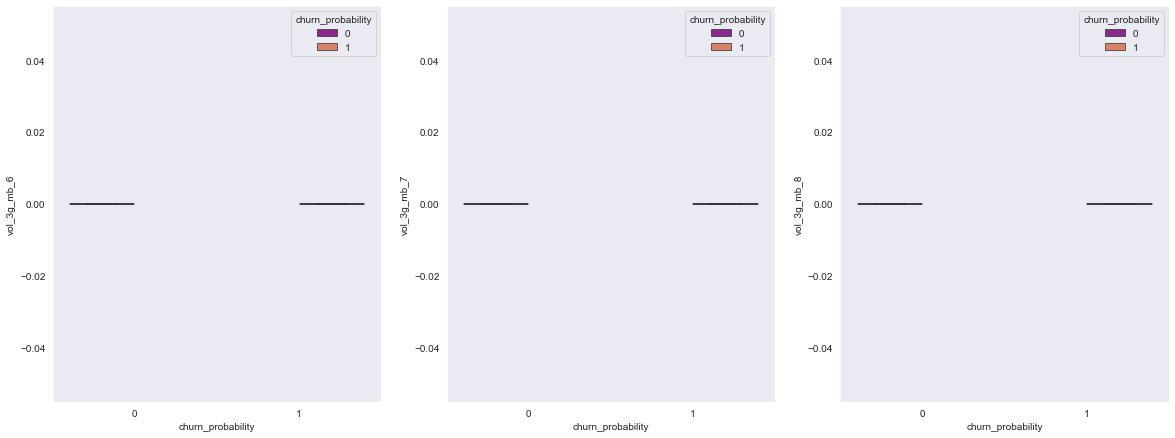

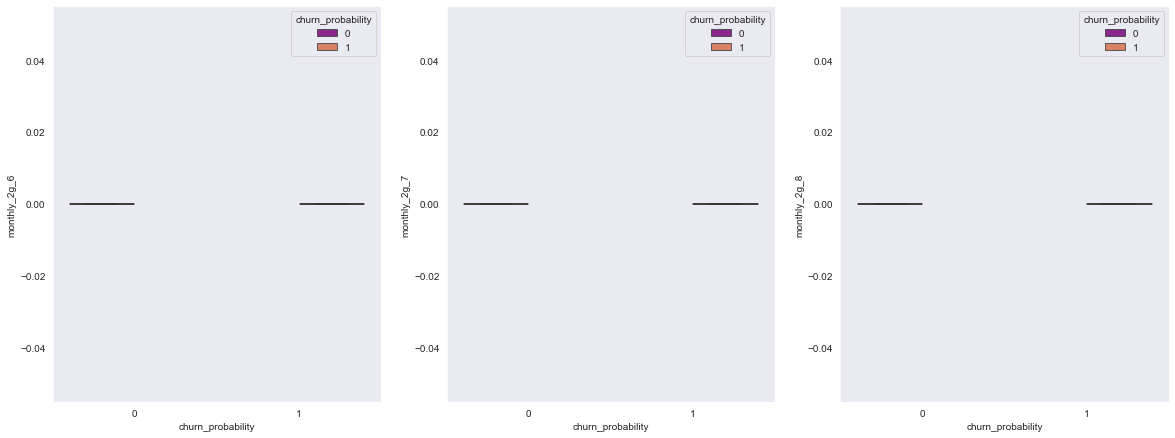

In [61]:
# Ploting for volume of 2G and 3G usage columns:

plot_box_chart('vol_3g_mb')
plot_box_chart('monthly_2g')

 #######vol_3g_mb, monthly_2g: Value range is very low, hence graph is not giving us any results .Hence doing analysis by checking mean value

##### Monthly 2G/3G service schemes

In [62]:
monthly_subcription_2g_3g = df_train.columns[df_train.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [63]:
def plot_mean_bar_chart(df_train,columns_list):
    df_0 = df_train[df_train.churn_probability==0].filter(columns_list)
    df_1 = df_train[df_train.churn_probability==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

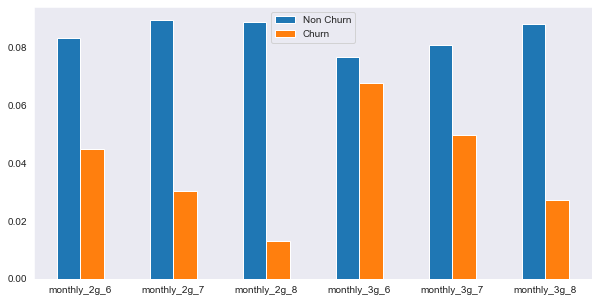

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.083207,0.089411,0.088616,0.076749,0.080917,0.088170
Churn,0.044728,0.030426,0.013180,0.067583,0.049635,0.027201


In [64]:
plot_mean_bar_chart(df_train, monthly_subcription_2g_3g)

Analysis: Again we can see a drop in monthly subscription for churned customers in 8th Month

##### Average Revenue Per User

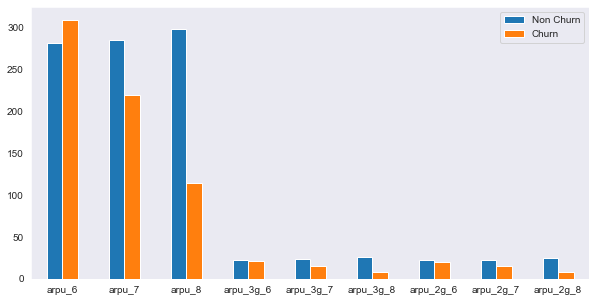

,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
Non Churn,280.280668,284.891073,297.535694,22.784535,23.588834,25.61194,21.977586,22.647536,24.394413
Churn,308.289067,219.081400,114.226380,21.025404,15.296405,8.24120,20.241185,15.403460,7.946576


In [65]:
# Checking columns for average revenue per user
avg_rev_user_cols = df_train.columns[df_train.columns.str.contains('arpu_')]

# Plotting arpu
plot_mean_bar_chart(df_train, avg_rev_user_cols)

Analysis: We can see that huge drops for arpu in 8th month for churned customers

Minutes of usage - voice calls

In [66]:
mou_cols = df_train.columns[df_train.columns.str.contains('mou')]

In [67]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()
    
def get_variable_type(element) :
    """
     Check is columns are of Contineous or Categorical variable.
     Assumption is that if 
                 unique count < 20 then categorical 
                 unique count >= 20 and dtype = [int64 or float64] then contineous
     """
    if element==0:
        return "Not Known"
    elif element < 20 and element!=0 :
        return "Categorical"
    elif element >= 20 and element!=0 :
        return "Continuous" 

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Unique_Values_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

def get_meta_data(dataframe) :
    """
     Method to get Meta-Data about any dataframe passed 
    """
    metadata_matrix = pd.DataFrame({
                    'Datatype' : dataframe.dtypes.astype(str), 
                    'Non_Null_Count': dataframe.count(axis = 0).astype(int), 
                    'Null_Count': dataframe.isnull().sum().astype(int), 
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100, 
                    'Unique_Values_Count': dataframe.nunique().astype(int) 
                     })
    
    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

In [68]:
meta_df = get_meta_data(df_train[mou_cols])
meta_df.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
col_to_display = ['Null_Percentage']
meta_df[col_to_display]

,Null_Percentage
onnet_mou_6,0.0
isd_og_mou_8,0.0
loc_ic_mou_8,0.0
loc_ic_mou_7,0.0
loc_ic_mou_6,0.0
...,...
loc_og_mou_8,0.0
loc_og_mou_7,0.0
loc_og_mou_6,0.0
loc_og_t2c_mou_8,0.0


In [69]:
mou_og_cols6 = df_train.columns[df_train.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [70]:
mou_og_cols7 = df_train.columns[df_train.columns.str.contains('.*_og_.*mou_7',regex=True)]

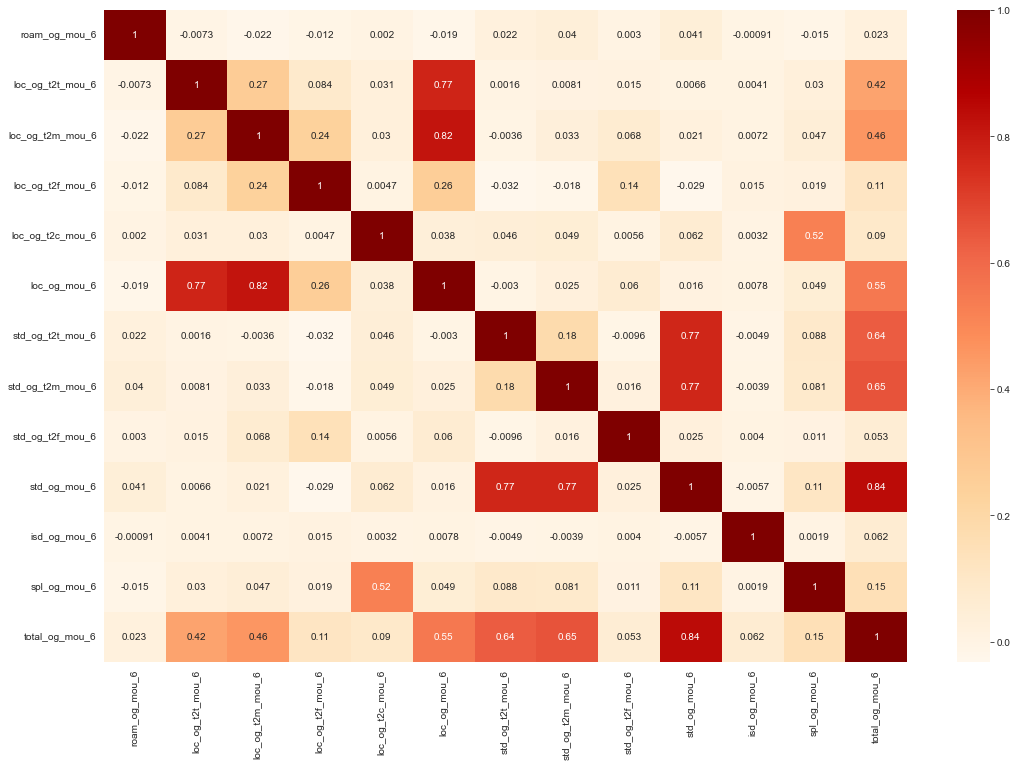

In [71]:
heatmap(18,12,df_train.filter(mou_og_cols6))

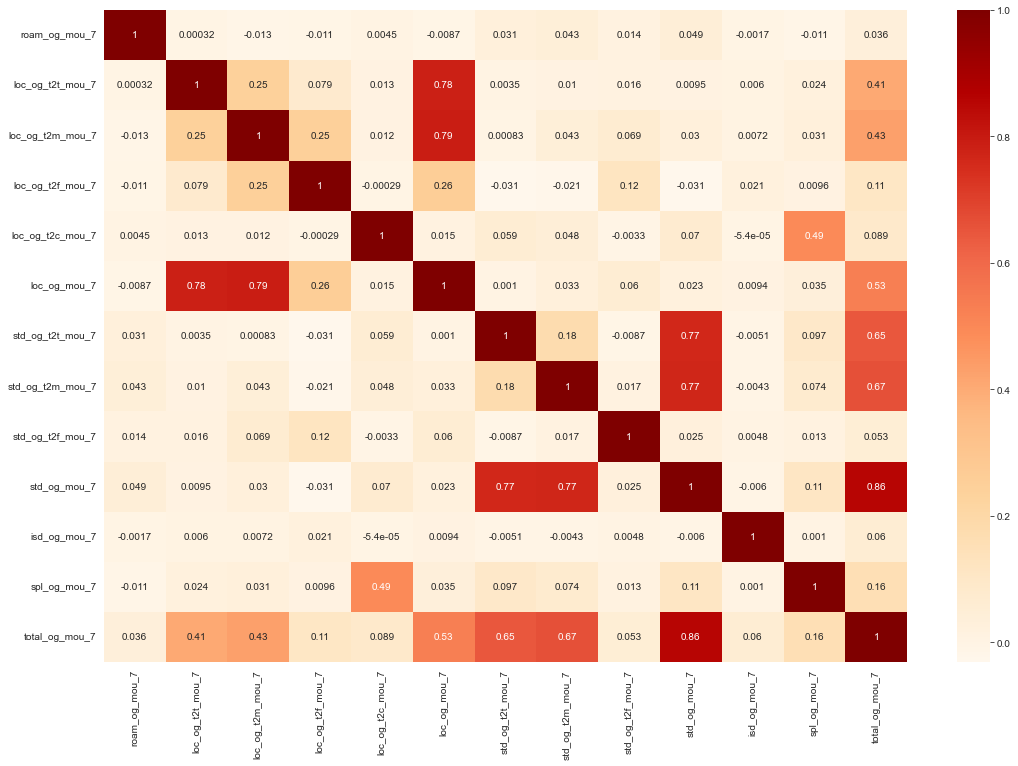

In [72]:
heatmap(18,12,df_train.filter(mou_og_cols7))

Analysis: We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [73]:
list_total_og_cols = df_train.columns[df_train.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
list_total_og_cols.tolist()

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [74]:
## dropping columns with multicollineriaty

df_train.drop(list_total_og_cols,axis=1,inplace=True)
df_test.drop(list_total_og_cols,axis=1,inplace=True)

In [75]:
df_train.shape

(69999, 144)

In [76]:
df_test.shape

(30000, 143)

In [77]:
df_train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.8588

### ONNET : All kind of calls within the same operator network

In [78]:
# minutes of usage related columns

onnet_usage_service =  df_train.columns[df_train.columns.str.contains('^onnet.*mou',regex=True)]

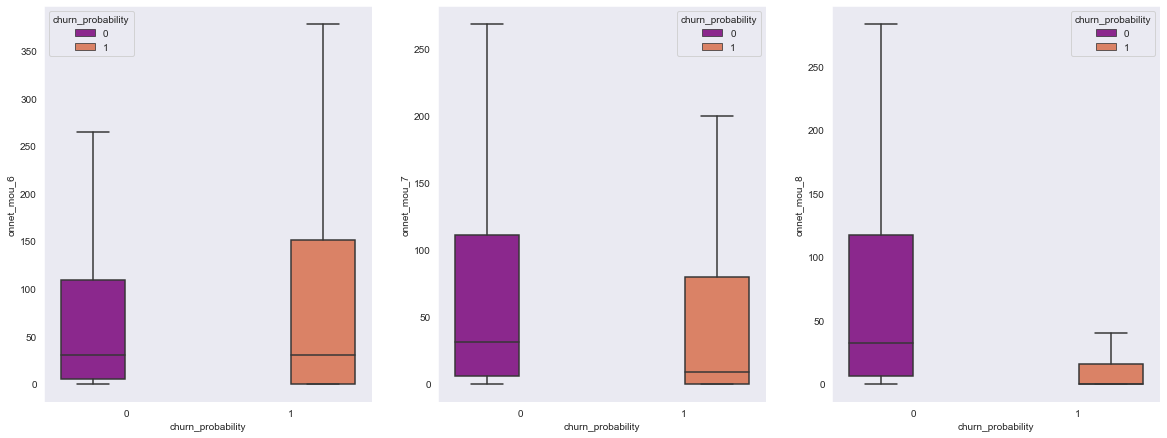

In [79]:
# plotting offnet

plot_box_chart('onnet_mou')

Analysis: We  see that there is a drop in Onnet usage in the 8th month for churned customers

#### Offnet Usage

In [80]:
offnet_usage_service = df_train.columns[df_train.columns.str.contains('offnet.*mou',regex=True)]

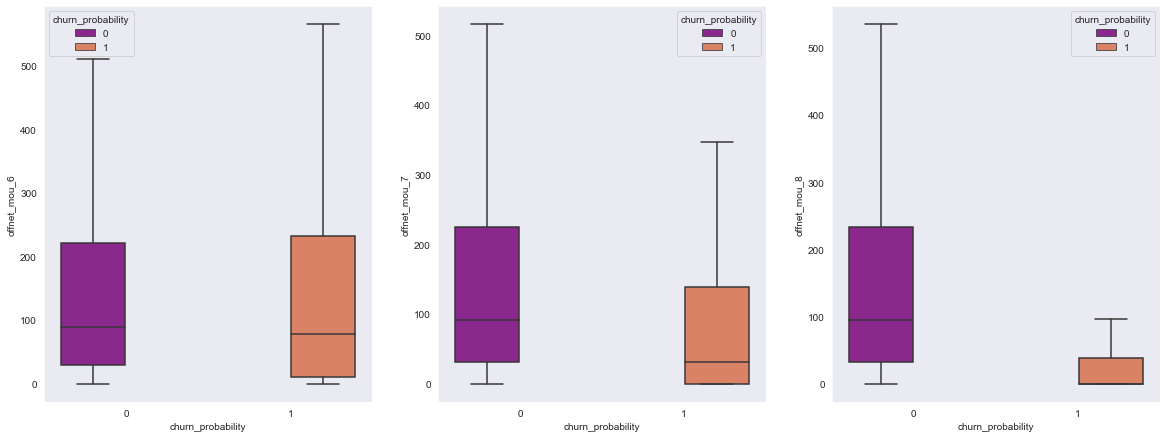

In [81]:
plot_box_chart('offnet_mou')

Analysis: We  see that there is a drop in offnet usage in the 8th month for churned customers

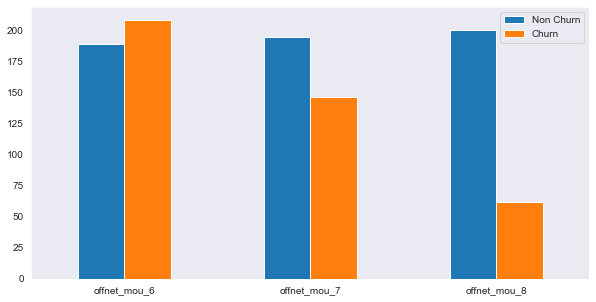

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,188.555888,194.030461,199.723655
Churn,208.114274,145.875771,62.037858


In [82]:
plot_mean_bar_chart(df_train, offnet_usage_service)

Tenure Analysis

In [83]:
tenure_data = df_train.copy()

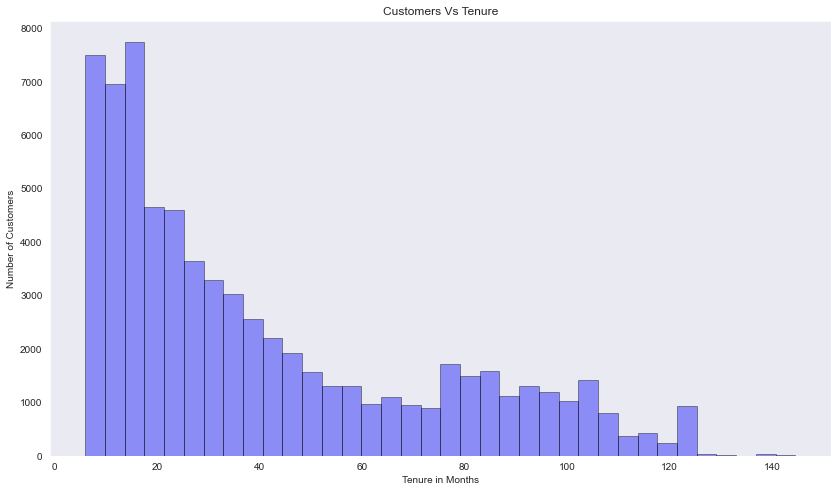

In [84]:
plt.figure(figsize=(14,8))
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [85]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

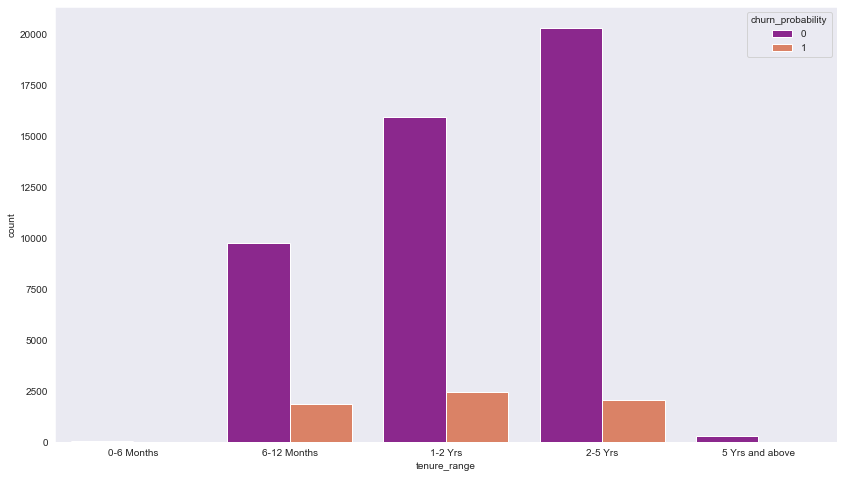

In [86]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn_probability',data = tenure_data,palette=("plasma"))
plt.show()

Analysis: From above we see that churn happens for the duration 6-12 months, 1-2 years and 2-5 years

## d) Modelling

### Creating X and y

In [87]:
# Putting feature variable to X
X = df_train.drop(['churn_probability','id'],axis=1)

# Putting response variable to y
y = df_train['churn_probability']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

### Splitting into train set and evaluation set

In [88]:
# importing the library

from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Feature Scaling

In [90]:
# importing the library

from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
48645,-0.403048,-0.467090,-0.151059,-0.430449,-0.416561,-0.410015,-0.545851,-0.518786,-0.535018,-0.076158,-0.122028,-0.124449,-0.038787,-0.160256,-0.140659,-0.294483,-0.285445,-0.288870,-0.493810,-0.484689,-0.472363,-0.265955,-0.268983,-0.260440,0.934804,-0.153017,-0.196272,-0.308255,-0.303930,-0.301132,-0.339474,-0.296922,-0.322947,-0.124045,-0.116311,-0.124944,-0.024745,-0.023509,-0.025135,-0.231136,-0.201202,-0.266308,-0.071406,-0.013568,-0.013886,-0.333915,-0.306799,-0.314690,-0.546924,-0.561284,-0.476107,-0.291470,-0.273534,-0.282020,-0.595594,-0.591496,-0.539792,-0.154055,-0.168810,-0.175921,-0.262327,-0.210652,-0.258315,-0.119437,-0.127061,-0.117441,-0.296707,-0.262196,-0.298575,-0.643677,-0.632411,-0.600116,-0.005637,-0.025193,-0.019986,-0.112106,-0.12194,-0.125968,-0.062729,-0.067007,-0.072459,0.344611,0.041619,0.527627,-0.553985,-0.582396,-0.446178,-0.651995,-0.644904,-0.658518,-0.389515,-0.356326,-0.368891,4.177801,2.762505,4.780979,-0.086224,-0.092285,-0.099501,4.946725,3.296134,5.133697,-0.214933,-0.208118,1.089973,1.185007,0.738009,1.499117,0.112622,0.005359,-0.049109,0.031614,0.131401,0.466439,-0.166951,-0.211661,0.798425,-0.197484,-0.211426,0.014206,1.640806,1.631007,1.611257,-0.266502,-0.271429,-0.267943,5.077584,3.394785,5.256557,-0.2105,-0.200107,-0.213719,-0.127099,-0.127373,1.414443,1.798854,1.787485,1.776294,-0.079445,0.971060,0.633541,0.433551
54979,-0.516249,-0.690846,-0.472585,-0.265272,-0.268475,-0.188338,-0.532912,-0.534454,-0.462916,-0.110053,-0.122028,-0.124449,0.001481,-0.160256,-0.140659,-0.059629,0.010403,0.173700,-0.443537,-0.478109,-0.532508,-0.186952,-0.268983,-0.180964,-0.182469,-0.153017,-0.196272,-0.308255,-0.307823,-0.301132,-0.323302,-0.323473,-0.251146,-0.124045,-0.116311,-0.124944,-0.024745,-0.023509,-0.025135,-0.231136,-0.113011,0.378530,-0.071406,-0.013568,-0.013886,1.531815,2.059264,1.767513,-0.191825,-0.259163,-0.254353,0.117342,0.142340,0.393601,0.726116,1.057825,0.9

## Model-1 Using Logistic Regression

In [92]:
# importing the statsmodel library

import statsmodels.api as sm

In [93]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48865
Model Family:                Binomial   Df Model:                          133
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 11 May 2022   Deviance:                       19317.
Time:                        01:04:08   Pearson chi2:                 1.94e+06
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.5755   6068.238     -0.001      0.999   -1.19e+04    1.19e+04
arpu_6                 0.3714      0.087      4.275      0.000       0.201       0.542
arpu_7                 0.3308      0.087      3.822      0.000       0.161       0.500
arpu_8                 0.3918      0.104      3.781      0.000       0.189       0.595
onnet_mou_6            0.4645      1.488      0.312      0.755      -2.452       3.381
onnet_mou_7           -1.2345      0.993     -1.243      0.214      -3.181       0.711
onnet_mou_8           -0.3710      1.314     -0.282      0.778      -2.947       2.205
offnet_mou_6           0.5948      1.566      0.380      0.704      -2.475       3.664
offnet_mou_7          -1.8666      0.989     -1.887      0.059      -3.806       0.073
offnet_mou_8          -0.6160      1.365     -0.451      0.652      -3.291       2.059
roam_ic_mou_6          0.0622      0.022      2.786      0.005       0.018       0.106
roam_ic_mou_7          0.0322      0.026      1.236      0.217      -0.019       0.083
roam_ic_mou_8         -0.0399      0.026     -1.515      0.130      -0.092       0.012
roam_og_mou_6         -0.1717      0.379     -0.453      0.651      -0.915       0.572
roam_og_mou_7          0.2930      0.191      1.533      0.125      -0.082       0.668
roam_og_mou_8          0.2222      0.290      0.767      0.443      -0.345       0.790
loc_og_t2t_mou_6      -0.2075      0.765     -0.271      0.786      -1.707       1.292
loc_og_t2t_mou_7       0.8102      0.513      1.579      0.114      -0.195       1.816
loc_og_t2t_mou_8      -0.3216      0.640     -0.502      0.615      -1.576       0.933
loc_og_t2m_mou_6      -0.3859      0.809     -0.477      0.633      -1.972       1.200
loc_og_t2m_mou_7       0.9015      0.478      1.885      0.059      -0.036       1.839
loc_og_t2m_mou_8      -0.0645      0.650     -0.099      0.921      -1.339       1.210
loc_og_t2f_mou_6      -0.0643      0.078     -0.826      0.409      -0.217       0.088
loc_og_t2f_mou_7       0.1710      0.065      2.647      0.008       0.044       0.298
loc_og_t2f_mou_8       0.0008      0.079      0.010      0.992      -0.154       0.156
loc_og_t2c_mou_6      -0.0753      0.029     -2.575      0.010      -0.133      -0.018
loc_og_t2c_mou_7       0.0204      0.027      0.753      0.451      -0.033       0.074
loc_og_t2c_mou_8       0.0584      0.033      1.761      0.078      -0.007       0.123
std_og_t2t_mou_6      -0.4225      1.255     -0.337      0.736      -2.881       2.036
std_og_t2t_mou_7       1.1152      0.841      1.325      0.185      -0.534       2.764
std_og_t2t_mou_8       0.2806      1.132      0.248      0.804      -1.939       2.500
std_og_t2m_mou_6      -0.4970      1.255     -0.396      0.692      -2.957       1.963
std_og_t2m_mou_7       1.6819      0.8

## Model-2 Using Logistic Regression and RFE for feature selection

#### Feature Selection Using RFE

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train,y_train)

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 2),
 ('arpu_7', False, 17),
 ('arpu_8', False, 33),
 ('onnet_mou_6', False, 64),
 ('onnet_mou_7', False, 94),
 ('onnet_mou_8', False, 24),
 ('offnet_mou_6', False, 123),
 ('offnet_mou_7', False, 31),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_6', False, 57),
 ('roam_ic_mou_7', False, 102),
 ('roam_ic_mou_8', False, 114),
 ('roam_og_mou_6', False, 119),
 ('roam_og_mou_7', False, 39),
 ('roam_og_mou_8', False, 5),
 ('loc_og_t2t_mou_6', False, 65),
 ('loc_og_t2t_mou_7', False, 32),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 52),
 ('loc_og_t2m_mou_7', False, 53),
 ('loc_og_t2m_mou_8', False, 124),
 ('loc_og_t2f_mou_6', False, 67),
 ('loc_og_t2f_mou_7', False, 66),
 ('loc_og_t2f_mou_8', False, 103),
 ('loc_og_t2c_mou_6', False, 43),
 ('loc_og_t2c_mou_7', False, 121),
 ('loc_og_t2c_mou_8', False, 36),
 ('std_og_t2t_mou_6', False, 63),
 ('std_og_t2t_mou_7', False, 84),
 ('std_og_t2t_mou_8', False, 128),
 ('std_og_t2m_mou_6', False, 122),
 ('std_og_t2m_mou

In [97]:
col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

In [99]:
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48983
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 11 May 2022   Deviance:                       23141.
Time:                        01:05:11   Pearson chi2:                 1.45e+16
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.1635    419.687     -0.012      0.990    -827.734     817.407
loc_og_t2t_mou_8      -0.7667      0.130     -5.908      0.000      -1.021      -0.512
og_others_8          -44.0089   2.63e+04     -0.002      0.999   -5.16e+04    5.15e+04
loc_ic_t2t_mou_8       2.2443      0.152     14.749      0.000       1.946       2.543
loc_ic_t2m_mou_7       0.5590      0.042     13.342      0.000       0.477       0.641
loc_ic_mou_8          77.4368      6.455     11.996      0.000      64.785      90.089
std_ic_t2t_mou_8       1.3169      0.371      3.551      0.000       0.590       2.044
std_ic_t2m_mou_8       1.8222      0.546      3.340      0.001       0.753       2.892
std_ic_mou_8          31.6308      2.813     11.246      0.000      26.118      37.143
total_ic_mou_8       -96.5857      7.506    -12.868      0.000    -111.297     -81.875
spl_ic_mou_8          -2.1035   1.04e+04     -0.000      1.000   -2.03e+04    2.03e+04
isd_ic_mou_8          21.0210      1.628     12.913      0.000      17.830      24.212
total_rech_num_8      -0.7121      0.035    -20.452      0.000      -0.780      -0.644
last_day_rch_amt_8    -0.5409      0.036    -14.939      0.000      -0.612      -0.470
av_rech_amt_data_8    -0.8568      0.056    -15.408      0.000      -0.966      -0.748
arpu_2g_8              0.4796      0.048      9.892      0.000       0.385       0.575
======================================================================================
"""

In [100]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [101]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['id'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,id
48645,0,0.032472,48645
54979,0,0.013618,54979
7134,0,0.000842,7134
6361,0,0.013556,6361
6647,0,0.007175,6647


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [102]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,id,predicted
48645,0,0.032472,48645,0
54979,0,0.013618,54979,0
7134,0,0.000842,7134,0
6361,0,0.013556,6361,0
6647,0,0.007175,6647,0


In [103]:
from sklearn import metrics

In [104]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[43846   120]
 [ 4656   377]]


In [105]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9025286230331231


#### Finding Optimal Cutoff Point

In [106]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
48645,0,0.032472,48645,0,1,0,0,0,0,0,0,0,0,0
54979,0,0.013618,54979,0,1,0,0,0,0,0,0,0,0,0
7134,0,0.000842,7134,0,1,0,0,0,0,0,0,0,0,0
6361,0,0.013556,6361,0,1,0,0,0,0,0,0,0,0,0
6647,0,0.007175,6647,0,1,0,0,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.102941  1.000000  0.000250
0.1   0.1  0.750505  0.856944  0.738321
0.2   0.2  0.866610  0.767137  0.877997
0.3   0.3  0.915284  0.674151  0.942888
0.4   0.4  0.930611  0.529108  0.976573
0.5   0.5  0.902529  0.074906  0.997271
0.6   0.6  0.898488  0.017683  0.999318
0.7   0.7  0.897753  0.006755  0.999750
0.8   0.8  0.897447  0.003179  0.999818
0.9   0.9  0.897365  0.001391  0.999932


### So, from above we see that the optimal threshold value comes out to be around 0.4. Let's consider this at the moment

In [108]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
48645,0,0.032472,48645,0,1,0,0,0,0,0,0,0,0,0
54979,0,0.013618,54979,0,1,0,0,0,0,0,0,0,0,0
7134,0,0.000842,7134,0,1,0,0,0,0,0,0,0,0,0
6361,0,0.013556,6361,0,1,0,0,0,0,0,0,0,0,0
6647,0,0.007175,6647,0,1,0,0,0,0,0,0,0,0,0


In [109]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[42936  1030]
 [ 2370  2663]]


In [110]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9306108287924243


The accuracy comes out to be approx. 0.9306 which is kind of decent.

#### Metrics beyond simply accuracy

In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP + FN)

0.5291078879395986

In [113]:
# Let us calculate specificity

TN / float(TN + FP)

0.9765728062593823

In [114]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP / float(TN + FP))

0.02342719374061775


In [115]:
# Positive predictive value

print (TP / float(TP + FP))

0.7210939615488763


In [116]:
# Negative predictive value
print (TN / float(TN + FN))

0.9476890478082374


#### Precision & Recall

In [117]:
from sklearn.metrics import precision_recall_curve

In [118]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(48645    0
 54979    0
 7134     0
 6361     0
 6647     0
         ..
 14260    0
 63370    0
 65615    0
 56088    0
 38408    0
 Name: Churn, Length: 48999, dtype: int64,
 48645    0
 54979    0
 7134     0
 6361     0
 6647     0
         ..
 14260    0
 63370    0
 65615    0
 56088    0
 38408    0
 Name: predicted, Length: 48999, dtype: int64)

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

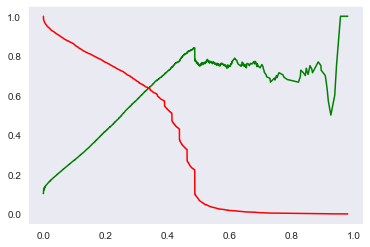

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

As from the above precision recall plot, we see that the optimum threshold is somewhere around 0.39.

### Let's check the model accuracy with cutoff as 0.39

In [121]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)

In [122]:
# Creating a dataframe with the actual churn flag and the predicted probabilities¶

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['id'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,id
48645,0,0.032472,48645
54979,0,0.013618,54979
7134,0,0.000842,7134
6361,0,0.013556,6361
6647,0,0.007175,6647


In [123]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.39 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.39 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,id,predicted
48645,0,0.032472,48645,0
54979,0,0.013618,54979,0
7134,0,0.000842,7134,0
6361,0,0.013556,6361,0
6647,0,0.007175,6647,0


In [124]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print(confusion)

[[42762  1204]
 [ 2156  2877]]


In [125]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9314271719831017


 This time around we got a model accuracy of about 0.9314 which is slightly higher than what we had received earlier.

### Model Evaluation

#### Scaling the X_test using 'scaler'

In [126]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
3425,-0.729889,0.799180,-0.777039,-0.344419,1.291362,-0.413324,-0.613776,1.988056,-0.578906,-0.160896,-0.122028,-0.124449,0.162551,0.239562,-0.140659,-0.301193,-0.131089,-0.295774,-0.556650,-0.274120,-0.572604,-0.265955,-0.268983,-0.26044,-0.182469,0.991843,-0.196272,-0.308255,1.588201,-0.301132,-0.339474,2.384748,-0.322947,-0.124045,-0.116311,-0.124944,-0.024745,-0.023509,-0.025135,-0.231136,2.973686,-0.207686,-0.071406,-0.013568,-0.013886,-0.333915,-0.179807,-0.314690,-0.606108,-0.392096,-0.617784,-0.29147,-0.273534,-0.282020,-0.639518,-0.407803,-0.632842,-0.174129,-0.020728,-0.175921,-0.262327,-0.210652,-0.258315,-0.119437,-0.127061,-0.117441,-0.306867,-0.176916,-0.298575,-0.686359,-0.392014,-0.671744,-0.005637,-0.025193,-0.019986,-0.112106,0.094979,-0.094029,-0.062729,-0.067007,-0.072459,-0.362970,1.606685,-0.728866,-0.700430,0.751639,-0.727212,-0.692926,-0.409295,-0.857934,-0.642204,-0.511195,-0.615845,-0.352742,-0.354545,-0.356698,-0.406905,-0.410325,-0.414218,-0.310719,-0.315832,-0.321308,-0.214933,-0.208118,-0.214082,-0.377682,-0.384841,-0.391222,-0.250547,-0.245359,-0.237965,-0.212825,-0.226203,-0.232342,-0.212304,-0.211661,-0.225666,-0.228899,-0.223653,-0.238193,-0.572060,-0.578068,-0.588397,-0.266502,-0.271429,-0.267943,-0.264034,-0.270044,-0.277288,-0.2105,-0.200107,-0.213719,-0.127099,-0.127373,-0.126759,-0.572723,-0.577599,-0.585366,-0.393356,-0.253647,-0.244543,-0.228676
33067,1.447335,0.816970,-0.082348,1.069910,0.501571,-0.330608,3.196513,0.665697,-0.277957,1.042389,1.378614,1.158985,1.182662,2.888358,1.696875,0.785842,0.274094,-0.295774,2.956148,-0.168835,-0.572604,-0.265955,-0.190130,-0.26044,-0.182469,0.737430,0.431510,0.656486,0.112651,-0.301132,1.900394,0.575474,-0.322947,-0.124045,-0.116311,-0.124944,-0.024745,-0.023509,-0.025135,-0.231136,-0.201202,-0.266308,-0.071406,-0.013568,-0.013886,0.909905,0.161066,-0.314690,1.459389,-0.392096,-0.623943,-0.29147,-0.273534,-0.282020,1.432891,-0.20457

#### Making predictions on X_test

In [127]:
# Getting the predicted values on the X_test

X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [128]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['id'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,id
3425,1,0.405305,3425
33067,1,0.314533,33067
52420,0,0.438699,52420
5220,0,0.165080,5220
33958,1,0.332429,33958


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.4 else 0

In [129]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_test_pred_final.head()

,Churn,Churn_Prob,id,predicted
3425,1,0.405305,3425,1
33067,1,0.314533,33067,0
52420,0,0.438699,52420,1
5220,0,0.165080,5220,0
33958,1,0.332429,33958,0


In [130]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

0.9322380952380952


And the model accuracy on test set is quite higher than that on train set which means our model is quite good.

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.39 else 0

In [131]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.39 else 0)

# Let's see the head
y_test_pred_final.head()

,Churn,Churn_Prob,id,predicted
3425,1,0.405305,3425,1
33067,1,0.314533,33067,0
52420,0,0.438699,52420,1
5220,0,0.165080,5220,0
33958,1,0.332429,33958,0


In [132]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

0.9332857142857143


The model accuracy on test set improved when we changed the threshold from 0.4 to 0.39

### Now, we will check the test dataset which we need to submit

### Making Submission-1 on Kaggle

In [133]:
df_test

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,91.882,65.330,64.445,31,20,23,60,32,34,0,0,0,0,0,0,24,20,21,18,10,8,0,13,0,0,0,0,6,0,2,42,7,26,0,0,0,0,0,0,0,0,0,0,0,0,30,37,21,10,4,9,0,0,0,40,42,31,0,0,0,0,1,4,0,0,0,0,1,4,41.73,43.56,36.26,0,0,0,0,0,0,0,0,0,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1692,0.00,0.00,0.00
1,70000,414.168,515.568,360.868,75,41,19,474,621,394,0,0,0,0,0,0,75,41,19,473,598,377,0,0,0,0,0,0,0,0,0,0,23,17,0,0,0,0,0,0,0,0,0,0,0,0,19,26,2,160,122,184,1,0,0,181,149,187,0,0,0,0,12,0,0,0,0,0,12,0,296.33,339.64,281.66,0,0,0,114,177,94,0,0,0,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,2533,0.00,0.00,0.00
2,70001,329.844,434.884,746.239,7,7,8,16,45,45,22,103,26,24,53,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,277,525.61,758.41,241.84
3,70002,43.550,171.390,24.400,5,2,0,40,205,24,0,0,0,0,0,0,5,0,0,2,98,20,0,0,2,0,6,0,0,2,0,37,94,0,0,0,0,0,0,0,0,12,1,0,0,0,58,54,23,487,449,506,0,0,1,546,504,531,0,4,0,9,11,8,0,0,0,9,16,8,555.69,522.44,549.13,0,0,0,0,1,8,0,0,0,3,5,2,110,260,0,110,150,0,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1244,0.00,0.00,0.00
4,70003,306.854,406.289,413.329,450,609,700,60,23,74,0,0,0,0,0,0,0,0,14,2,2,10,0,0,0,0,0,0,450,608,686,58,21,63,0,0,0,0,0,0,0

#### Scaling the df_test using 'scaler'

In [134]:
df_test1 = df_test.drop(['id'], axis=1)

df_test1[df_test1.columns] = scaler.transform(df_test1[df_test1.columns])
df_test1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.561158,-0.596354,-0.586700,-0.327213,-0.354036,-0.337226,-0.419703,-0.493718,-0.475455,-0.160896,-0.122028,-0.124449,-0.186434,-0.160256,-0.140659,-0.140151,-0.156815,-0.150789,-0.443537,-0.504430,-0.519142,-0.265955,0.756114,-0.260440,-0.182469,-0.153017,-0.196272,-0.283727,-0.307823,-0.293426,-0.169664,-0.308301,-0.224694,-0.124045,-0.116311,-0.124944,-0.024745,-0.023509,-0.025135,-0.231136,-0.201202,-0.266308,-0.071406,-0.013568,-0.013886,-0.114417,-0.059499,-0.166465,-0.546924,-0.591496,-0.568505,-0.291470,-0.273534,-0.282020,-0.479795,-0.462520,-0.511472,-0.174129,-0.168810,-0.175921,-0.262327,-0.249483,-0.205415,-0.119437,-0.127061,-0.117441,-0.306867,-0.290623,-0.259701,-0.542603,-0.531057,-0.559181,-0.005637,-0.025193,-0.019986,-0.112106,-0.121940,-0.125968,-0.062729,-0.067007,-0.072459,-0.362970,-0.385217,-0.449646,-0.546663,-0.547104,-0.592316,-0.447340,-0.604282,-0.618635,-0.338977,-0.304704,-0.615845,-0.352742,-0.354545,-0.356698,-0.406905,-0.410325,-0.414218,-0.310719,-0.315832,-0.321308,-0.214933,-0.208118,-0.214082,-0.377682,-0.384841,-0.391222,-0.250547,-0.245359,-0.237965,-0.212825,-0.226203,-0.232342,-0.212304,-0.211661,-0.225666,-0.228899,-0.223653,-0.238193,-0.57206,-0.578068,-0.588397,-0.266502,-0.271429,-0.267943,-0.264034,-0.270044,-0.277288,-0.2105,-0.200107,-0.213719,-0.127099,-0.127373,-0.126759,-0.572723,-0.577599,-0.585366,0.494835,-0.253647,-0.244543,-0.228676
1,0.389865,0.664654,0.224001,-0.175801,-0.284929,-0.350460,0.919396,1.351945,0.653104,-0.160896,-0.122028,-0.124449,-0.186434,-0.160256,-0.140659,0.202064,-0.021754,-0.164597,2.415718,3.364783,1.946773,-0.265955,-0.268983,-0.260440,-0.182469,-0.153017,-0.196272,-0.308255,-0.307823,-0.301132,-0.339474,-0.247612,-0.258704,-0.124045,-0.116311,-0.124944,-0.024745,-0.023509,-0.025135,-0.231136,-0.201202,-0.266308,-0.071406,-0.013568,-0.013886,-0.194900,-0.133020,-0.300573,0.340825,0.121510,0.509469,-0.265919,-0.273534,-0.282020,

#### Make predictions on test dataset

In [135]:
# Getting the predicted values on the df_test1

df_test1_sm = sm.add_constant(df_test1[col])
df_test_pred = res.predict(df_test1_sm)

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [136]:
df_test_pred

0        0.215665
1        0.014817
2        0.367096
3        0.000037
4        0.076941
           ...   
29995    0.000011
29996    0.139580
29997    0.175403
29998    0.127282
29999    0.023622
Length: 30000, dtype: float64

In [137]:
df_test_pred_final = pd.DataFrame({'id':df_test.id, 'Churn_Prob':df_test_pred})
df_test_pred_final['id'] = df_test.id
df_test_pred_final.head()

,id,Churn_Prob
0,69999,0.215665
1,70000,0.014817
2,70001,0.367096
3,70002,0.000037
4,70003,0.076941


#### Creating new column 'churn_probability' with 1 if Churn_Prob > 0.4 else 0

In [138]:
df_test_pred_final['churn_probability'] = df_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
df_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,0.215665,0
1,70000,0.014817,0
2,70001,0.367096,0
3,70002,0.000037,0
4,70003,0.076941,0


In [139]:
df_test_pred_final.drop(['Churn_Prob'], axis=1, inplace=True)

In [140]:
df_test_pred_final.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


#### Exporting the above dataframe for submission

In [141]:
df_test_pred_final.to_csv (r'D:\Studies\00 UpGrad MSc AI&ML\01 Courses\04 Machine Learning-2\09 Telecom Churn Group Case Study\export_dataframe.csv', index = False, header=True)

### Making Submission-2 on Kaggle

In [142]:
df_test_pred_final1 = pd.DataFrame({'id':df_test.id, 'Churn_Prob':df_test_pred})
df_test_pred_final1['id'] = df_test.id
df_test_pred_final1.head()

,id,Churn_Prob
0,69999,0.215665
1,70000,0.014817
2,70001,0.367096
3,70002,0.000037
4,70003,0.076941


In [143]:
df_test_pred_final1['churn_probability'] = df_test_pred_final1.Churn_Prob.map(lambda x: 1 if x > 0.39 else 0)

# Let's see the head
df_test_pred_final1.head()

,id,Churn_Prob,churn_probability
0,69999,0.215665,0
1,70000,0.014817,0
2,70001,0.367096,0
3,70002,0.000037,0
4,70003,0.076941,0


In [144]:
df_test_pred_final1.drop(['Churn_Prob',], axis=1, inplace=True)

In [145]:
df_test_pred_final1.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


#### Exporting the above dataframe for submission¶

In [146]:
df_test_pred_final1.to_csv (r'D:\Studies\00 UpGrad MSc AI&ML\01 Courses\04 Machine Learning-2\09 Telecom Churn Group Case Study\export_dataframe1.csv', index = False, header=True)

## Model-3: Using PCA on the data

In [147]:
X_train.shape

(48999, 142)

In [148]:
# importing library

from sklearn.decomposition import PCA

In [149]:
pca = PCA(random_state=42)

In [150]:
pca.fit(X_train)

PCA(random_state=42)

In [151]:
pca.components_

array([[ 1.15223590e-01,  1.20758374e-01,  1.15824887e-01, ...,
         1.26293694e-01,  1.28868455e-01,  1.23082703e-01],
       [ 1.48307023e-01,  1.54650764e-01,  1.47115423e-01, ...,
        -3.68924219e-02, -3.90466724e-02, -3.86035311e-02],
       [-3.60083469e-03, -7.67499285e-03, -4.88866626e-03, ...,
         7.10452857e-02,  7.54972496e-02,  8.16850034e-02],
       ...,
       [-0.00000000e+00, -1.62840467e-16, -1.87348070e-16, ...,
        -4.29212615e-17,  9.47662809e-18,  2.09051762e-17],
       [-0.00000000e+00,  2.12868929e-17,  1.74346899e-16, ...,
         8.24437982e-17, -1.75467154e-17, -5.66917279e-17],
       [-0.00000000e+00, -3.66755778e-18, -1.99682466e-16, ...,
        -2.80593296e-17,  1.40331540e-17,  9.92240283e-17]])

In [152]:
pca.explained_variance_ratio_

array([1.35588391e-01, 8.24455423e-02, 5.52636969e-02, 5.33803214e-02,
       3.71672798e-02, 3.20840129e-02, 2.87874557e-02, 2.47333144e-02,
       2.31518974e-02, 2.13295696e-02, 2.07064509e-02, 2.01830629e-02,
       1.90322340e-02, 1.77617217e-02, 1.70462041e-02, 1.70278486e-02,
       1.54008464e-02, 1.45872716e-02, 1.45466860e-02, 1.26692591e-02,
       1.22675499e-02, 1.19619493e-02, 1.18526409e-02, 1.14201504e-02,
       1.12720318e-02, 1.08337579e-02, 1.06400437e-02, 9.21913375e-03,
       8.84365969e-03, 8.38185300e-03, 7.88864369e-03, 7.30182312e-03,
       7.05771066e-03, 7.02422616e-03, 6.93425120e-03, 6.76097084e-03,
       6.59640792e-03, 6.52777719e-03, 6.42132203e-03, 6.19923450e-03,
       6.10926758e-03, 5.96631512e-03, 5.90007456e-03, 5.55388377e-03,
       5.46110329e-03, 5.13708817e-03, 4.95473718e-03, 4.71102835e-03,
       4.34884500e-03, 4.15503974e-03, 3.80210074e-03, 3.71451676e-03,
       3.63622255e-03, 3.38654658e-03, 3.28195214e-03, 3.22417057e-03,
      

Making a scree plot for the explained variance

In [153]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

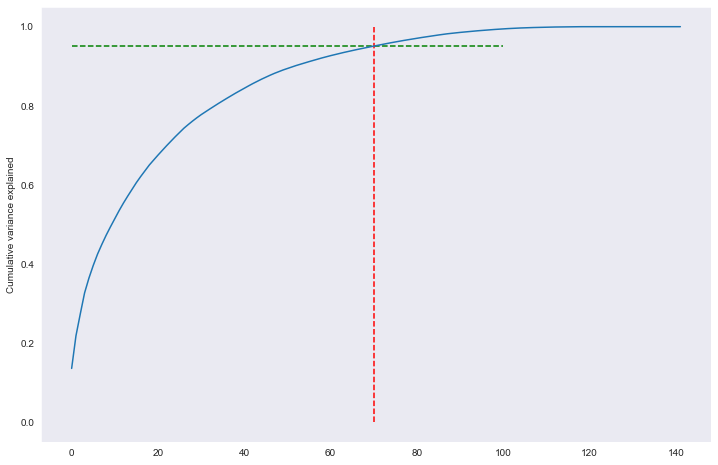

In [154]:
fig = plt.figure(figsize=[12,8])
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

So from the above scree plot we see that the 95% variance is explained by 70 components. Let's perform PCA with 70 components.

In [155]:
from sklearn.decomposition import IncrementalPCA

In [156]:
pca_final = IncrementalPCA(n_components=70)

In [157]:
X_train_pca = pca_final.fit_transform(X_train)

In [158]:
X_train_pca.shape

(48999, 70)

In [159]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [160]:
corrmat.shape

(70, 70)

Plotting the heatmap of correlation matrix

<AxesSubplot:>

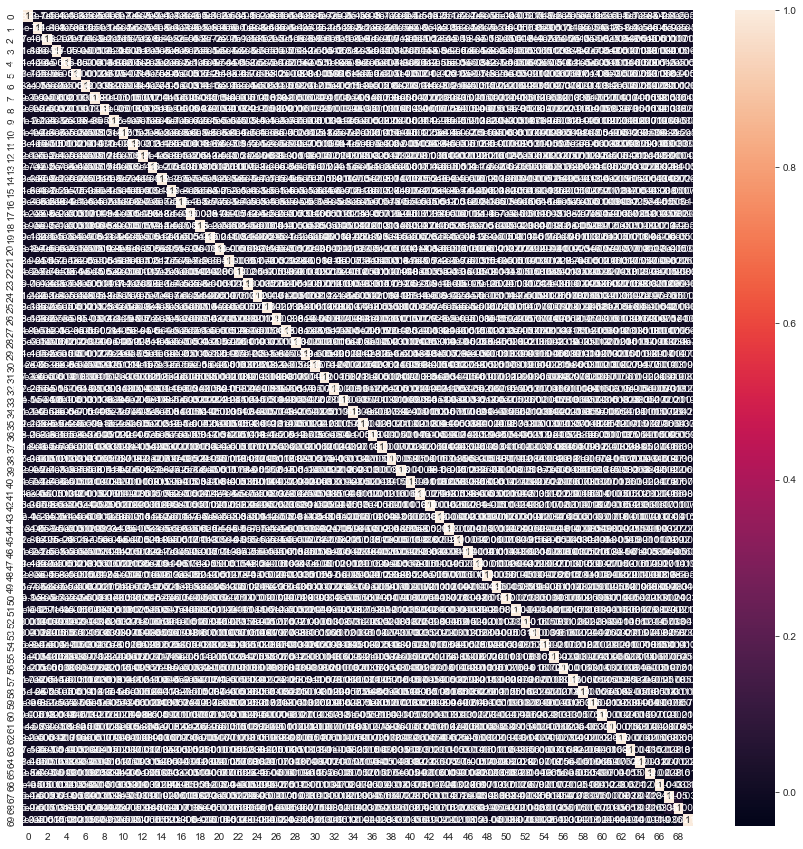

In [161]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on test set

In [162]:
X_test_pca = pca_final.transform(X_test)

### Applying logistic regression on the data on our Principal components¶

In [163]:
learner_pca = LogisticRegression()

In [164]:
model_pca = learner_pca.fit(X_train_pca, y_train)

In [165]:
pred_probs_train = model_pca.predict_proba(X_train_pca)

In [166]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [167]:
y_train_pca_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':pred_probs_train[:,1]})
y_train_pca_pred_final['id'] = y_train.index
y_train_pca_pred_final

,Churn,Churn_Prob,id
0,0,0.009466,48645
1,0,0.006436,54979
2,0,0.000261,7134
3,0,0.009120,6361
4,0,0.005704,6647
...,...,...,...
48994,0,0.057297,14260
48995,0,0.000034,63370
48996,0,0.045009,65615
48997,0,0.035932,56088


#### Finding optimal cutoff

In [168]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pca_pred_final[i]= y_train_pca_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pca_pred_final.head()

,Churn,Churn_Prob,id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.009466,48645,1,0,0,0,0,0,0,0,0,0
1,0,0.006436,54979,1,0,0,0,0,0,0,0,0,0
2,0,0.000261,7134,1,0,0,0,0,0,0,0,0,0
3,0,0.009120,6361,1,0,0,0,0,0,0,0,0,0
4,0,0.005704,6647,1,0,0,0,0,0,0,0,0,0


In [169]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pca_pred_final.Churn, y_train_pca_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.102716  1.000000  0.000000
0.1   0.1  0.768526  0.852176  0.758950
0.2   0.2  0.874508  0.767336  0.886776
0.3   0.3  0.912631  0.654878  0.942137
0.4   0.4  0.919366  0.447646  0.973366
0.5   0.5  0.908692  0.200874  0.989719
0.6   0.6  0.902896  0.094973  0.995383
0.7   0.7  0.900141  0.049275  0.997544
0.8   0.8  0.898814  0.023247  0.999045
0.9   0.9  0.898018  0.009537  0.999727


Based on the above table, let's take the optimal threshold to be 0.37

In [170]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.37 else 0

y_train_pca_pred_final['predicted'] = y_train_pca_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.37 else 0)

# Let's see the head
y_train_pca_pred_final.head()

,Churn,Churn_Prob,id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.009466,48645,1,0,0,0,0,0,0,0,0,0,0
1,0,0.006436,54979,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000261,7134,1,0,0,0,0,0,0,0,0,0,0
3,0,0.009120,6361,1,0,0,0,0,0,0,0,0,0,0
4,0,0.005704,6647,1,0,0,0,0,0,0,0,0,0,0


In [171]:
print(metrics.accuracy_score(y_train_pca_pred_final.Churn, y_train_pca_pred_final.predicted))

0.920814710504296


As we see, the accuracy is approx. 92% and hence , we can conclude that the model is quite good.

In [172]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pca_pred_final.Churn, y_train_pca_pred_final.predicted)
print(confusion)

[[42432  1534]
 [ 2346  2687]]


In [173]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP + FN)

0.533876415656666

In [175]:
# Let us calculate specificity

TN / float(TN + FP)

0.9651094027202839

In [176]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP / float(TN + FP))

0.03489059727971614


In [177]:
# Positive predictive value

print (TP / float(TP + FP))

0.636579009713338


In [178]:
# Negative predictive value

print (TN / float(TN + FN))

0.9476082004555809


### Model evaluation

#### Let's evaluate the model on the

In [179]:
y_test_pca_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':pred_probs_test[:,1]})
y_test_pca_pred_final['id'] = y_test.index
y_test_pca_pred_final

,Churn,Churn_Prob,id
0,1,0.526309,3425
1,1,0.639093,33067
2,0,0.393300,52420
3,0,0.058901,5220
4,1,0.255098,33958
...,...,...,...
20995,0,0.148692,6664
20996,0,0.007781,60333
20997,0,0.010058,26916
20998,0,0.000197,31350


In [180]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.37 else 0

y_test_pca_pred_final['predicted'] = y_test_pca_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.37 else 0)

# Let's see the head
y_test_pca_pred_final.head()

,Churn,Churn_Prob,id,predicted
0,1,0.526309,3425,1
1,1,0.639093,33067,1
2,0,0.393300,52420,1
3,0,0.058901,5220,0
4,1,0.255098,33958,0


In [181]:
print(metrics.accuracy_score(y_test_pca_pred_final.Churn, y_test_pca_pred_final.predicted))

0.919952380952381


### Making Submission-3 on Kaggle

In [182]:
df_test1 = df_test.drop(['id'], axis=1)

df_test1[df_test1.columns] = scaler.transform(df_test1[df_test1.columns])

df_test_pca = pca_final.transform(df_test1)

In [183]:
df_test_pred = model_pca.predict_proba(df_test_pca)

In [184]:
df_test_pred_final = pd.DataFrame({'id':df_test.id, 'Churn_Prob':df_test_pred[:,1]})
df_test_pred_final['id'] = df_test.id
df_test_pred_final.head()

,id,Churn_Prob
0,69999,0.195840
1,70000,0.003512
2,70001,0.312385
3,70002,0.000933
4,70003,0.061183


In [185]:
df_test_pred_final['churn_probability'] = df_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.39 else 0)

# Let's see the head
df_test_pred_final.head()

,id,Churn_Prob,churn_probability
0,69999,0.195840,0
1,70000,0.003512,0
2,70001,0.312385,0
3,70002,0.000933,0
4,70003,0.061183,0


In [186]:
df_test_pred_final.drop(['Churn_Prob',], axis=1, inplace=True)

In [187]:
df_test_pred_final.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [188]:
df_test_pred_final.to_csv (r'D:\Studies\00 UpGrad MSc AI&ML\01 Courses\04 Machine Learning-2\09 Telecom Churn Group Case Study\export_dataframe1.csv', index = False, header=True)

## e) Conclusions

So, we have finally build our models and as far as the accuracy is concerned, the model-2 where we considered the optimal cutoff as 0.39. We found the model worked well on the train-test set with approx. accuracy of 93% on both the datasets.
We also found that the most important variables were:<br>

loc_og_t2t_mou_8<br>
og_others_8<br>
loc_ic_t2t_mou_8<br>
loc_ic_t2m_mou_7<br>
loc_ic_mou_8<br>
std_ic_t2t_mou_8<br>
std_ic_t2m_mou_8<br>
std_ic_mou_8<br>
total_ic_mou_8<br>
spl_ic_mou_8<br>
isd_ic_mou_8<br>
total_rech_num_8<br>
last_day_rch_amt_8<br>
av_rech_amt_data_8<br>
arpu_2g_8<br>

Std incoming Calls and local incoming calls for 8th Month are strong indicators of Churn.<br>
Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.<br>
Total Recharge Amount is a strong feature to predict churn.<br>